# Cricket Dataset Analysis

The T-20 World Cup 2022 dataset provides a goldmine of cricket data, including detailed match
statistics, player performances, and game-changing events. Your mission is to unravel the stories hidden
within this dataset.

## Attributes:

- Match details: Match ID, names of the home and away teams, innings details, over-by-over progress.
- Player statistics: Runs, wickets, and other player-specific details.
- Match events: Boundaries, wickets, retired hurt scenarios, and more.
- Commentary text: Pre-match, in-match, and post-match commentary snippets.

## Importing the Libraries

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
import scipy.stats
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import function to perform logistic regression
from sklearn.linear_model import LogisticRegression


# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

import os
os.getcwd()
# os.chdir("C:\Users\HP")
# os.getcwd()

pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import various functions from scipy
from scipy import stats

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

## Importing & Loading the Dataset

In [4]:
df = pd.read_csv('T-20 World Cup 2022.csv')
df.head()

comment_id  match_id match_name home_team away_team current_innings  \
0         130   1298179  ENG v PAK       PAK       ENG             PAK   
1         120   1298179  ENG v PAK       PAK       ENG             PAK   
2         110   1298179  ENG v PAK       PAK       ENG             PAK   
3         140   1298179  ENG v PAK       PAK       ENG             PAK   
4         150   1298179  ENG v PAK       PAK       ENG             PAK   

   innings_id  over  ball  runs                             shortText  \
0           1     1     1     0     Stokes to Mohammad Rizwan, no run   
1           1     1     1     1     Stokes to Mohammad Rizwan, 1 wide   
2           1     1     1     1  Stokes to Mohammad Rizwan, 1 no ball   
3           1     1     2     2     Stokes to Mohammad Rizwan, 2 runs   
4           1     1     3     0     Stokes to Mohammad Rizwan, no run   

   isBoundary  isWide  isNoball  batsman1_id    batsman1_name  batsman1_runs  \
0       False   False     False       323389  Mohammad Rizwan              0   
1       False    True     False       323389  Mohammad Rizwan              0   
2       False   False      True       323389  Mohammad Rizwan              0   
3       False   False     False       323389  Mohammad Rizwan              2   
4       False   False     False       323389  Mohammad Rizwan              2   

   batsman1_balls  bowler1_id bowler1_name  bowler1_overs  bowler1_maidens  \
0               2      311158   Ben Stokes       0.100000                0   
1               1      311158   Ben Stokes       0.000000                0   
2               1      311158   Ben Stokes       0.000000                0   
3               3      311158   Ben Stokes       0.200000                0   
4               4      311158   Ben Stokes       0.300000                0   

   bowler1_runs  bowler1_wkts  batsman2_id batsman2_name  batsman2_runs  \
0             2             0       348144    Babar Azam              0   
1             2             0       348144    Babar Azam              0   
2             1             0       348144    Babar Azam              0   
3             4             0       348144    Babar Azam              0   
4             4             0       348144    Babar Azam              0   

   batsman2_balls  bowler2_id bowler2_name  bowler2_overs  bowler2_maidens  \
0               0         NaN          NaN            NaN              NaN   
1               0         NaN          NaN            NaN              NaN   
2               0         NaN          NaN            NaN              NaN   
3               0         NaN          NaN            NaN              NaN   
4               0         NaN          NaN            NaN              NaN   

   bowler2_runs  bowler2_wkts  wicket_id wkt_batsman_name wkt_bowler_name  \
0           NaN           NaN        NaN              NaN             NaN   
1           NaN           NaN        NaN              NaN             NaN   
2           NaN           NaN        NaN              NaN             NaN   
3           NaN           NaN        NaN              NaN             NaN   
4           NaN           NaN        NaN              NaN             NaN   

   wkt_batsman_runs  wkt_batsman_balls wkt_text  isRetiredHurt  \
0               NaN                NaN      NaN          False   
1               NaN                NaN      NaN          False   
2               NaN                NaN      NaN          False   
3               NaN                NaN      NaN          False   
4               NaN                NaN      NaN          False   

                                                text  \
0  short again, and he gets some extra bounce on ...   
1  and he'll have to bowl another free-hit after ...   
2  full, and a hint of shape away from off stump....   
3  shortish, angling down leg, gloves a pull down...   
4  length ball close to off stump, straightens a ...   

                                             preText

In [42]:
df.shape

(9814, 44)

In [5]:
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['match_name', 'home_team', 'away_team', 'current_innings', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_name', 'bowler1_name',
       'batsman2_name', 'bowler2_name', 'wkt_batsman_name', 'wkt_bowler_name',
       'wkt_text', 'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')

In [6]:
#converting the datatype from object to category

df_cat = df_cat.astype('category')

In [7]:
#detecting columns with null values

(df_cat.isnull().sum()/(df.index.size)*100)[df_cat.isnull().sum()/(df.index.size)*100 >70].sort_values(ascending=False)

wkt_batsman_name   94.385572
wkt_bowler_name    94.385572
wkt_text           94.385572
postText           88.913797
preText            81.037294
dtype: float64

In [8]:
#removing columns with more than 70% null values

nan_ratio= df_cat.isna().mean(axis='index')
cols_to_drop= nan_ratio.index[nan_ratio>=0.7].to_list()
df_cat.drop(columns=cols_to_drop, inplace=True)

In [9]:
(df_cat.isnull().sum()/(df.index.size)*100)[df_cat.isnull().sum()/(df.index.size)*100 >0].sort_values(ascending=False)

bowler2_name   5.359690
text           0.285307
dtype: float64

In [10]:
#using 'simple imputaer' imputing the null values with 'most freuent' value or 'mode'

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imputer.fit(df_cat.iloc[:,:])

SimpleImputer(strategy='most_frequent')

In [11]:
df_cat_trans = imputer.transform(df_cat)
df_cat= pd.DataFrame(df_cat_trans,columns=df_cat.columns)
df_cat.isnull().sum()

match_name         0
home_team          0
away_team          0
current_innings    0
shortText          0
isBoundary         0
isWide             0
isNoball           0
batsman1_name      0
bowler1_name       0
batsman2_name      0
bowler2_name       0
isRetiredHurt      0
text               0
dtype: int64

In [12]:
df_cat.columns

Index(['match_name', 'home_team', 'away_team', 'current_innings', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_name', 'bowler1_name',
       'batsman2_name', 'bowler2_name', 'isRetiredHurt', 'text'],
      dtype='object')

In [13]:
df_cat.shape

(9814, 14)

In [14]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

comment_id  match_id  innings_id  over  ball  runs  batsman1_id  \
0         130   1298179           1     1     1     0       323389   
1         120   1298179           1     1     1     1       323389   
2         110   1298179           1     1     1     1       323389   
3         140   1298179           1     1     2     2       323389   
4         150   1298179           1     1     3     0       323389   

   batsman1_runs  batsman1_balls  bowler1_id  bowler1_overs  bowler1_maidens  \
0              0               2      311158       0.100000                0   
1              0               1      311158       0.000000                0   
2              0               1      311158       0.000000                0   
3              2               3      311158       0.200000                0   
4              2               4      311158       0.300000                0   

   bowler1_runs  bowler1_wkts  batsman2_id  batsman2_runs  batsman2_balls  \
0             2             0       348144              0               0   
1             2             0       348144              0               0   
2             1             0       348144              0               0   
3             4             0       348144              0               0   
4             4             0       348144              0               0   

   bowler2_id  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0         NaN            NaN              NaN           NaN           NaN   
1         NaN            NaN              NaN           NaN           NaN   
2         NaN            NaN              NaN           NaN           NaN   
3         NaN            NaN              NaN           NaN           NaN   
4         NaN            NaN              NaN           NaN           NaN   

   wicket_id  wkt_batsman_runs  wkt_batsman_balls  
0        NaN               NaN                NaN  
1        NaN               NaN                NaN  
2        NaN               NaN                NaN  
3        NaN               NaN                NaN  
4        NaN               NaN                NaN

In [15]:
(df_num.isnull().sum()/(df.index.size)*100)[df_num.isnull().sum()/(df.index.size)*100 > 70].sort_values(ascending=False)

wicket_id           94.385572
wkt_batsman_runs    94.385572
wkt_batsman_balls   94.385572
dtype: float64

In [16]:
#dropping columns with more than 70% 'nan' values

nan= df_num.isna().mean(axis='index')
cols= nan.index[nan>=0.5].to_list()
df_num.drop(columns=cols, inplace=True)

In [17]:
(df_num.isnull().sum()/(df.index.size)*100)[df_num.isnull().sum()/(df.index.size)*100 > 0].sort_values(ascending=False)

bowler2_id        5.359690
bowler2_overs     5.359690
bowler2_maidens   5.359690
bowler2_runs      5.359690
bowler2_wkts      5.359690
dtype: float64

In [18]:
##using 'simple imputaer' imputing the null values with 'median' value of each column

im = SimpleImputer(missing_values=np.nan,strategy='median')
im.fit(df_num.iloc[:,:])

SimpleImputer(strategy='median')

In [19]:
df_num_trans = im.transform(df_num)
df_num= pd.DataFrame(df_num_trans,columns=df_num.columns)
df_num.isnull().sum()

comment_id         0
match_id           0
innings_id         0
over               0
ball               0
runs               0
batsman1_id        0
batsman1_runs      0
batsman1_balls     0
bowler1_id         0
bowler1_overs      0
bowler1_maidens    0
bowler1_runs       0
bowler1_wkts       0
batsman2_id        0
batsman2_runs      0
batsman2_balls     0
bowler2_id         0
bowler2_overs      0
bowler2_maidens    0
bowler2_runs       0
bowler2_wkts       0
dtype: int64

In [20]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comment_id       9814 non-null   float64
 1   match_id         9814 non-null   float64
 2   innings_id       9814 non-null   float64
 3   over             9814 non-null   float64
 4   ball             9814 non-null   float64
 5   runs             9814 non-null   float64
 6   batsman1_id      9814 non-null   float64
 7   batsman1_runs    9814 non-null   float64
 8   batsman1_balls   9814 non-null   float64
 9   bowler1_id       9814 non-null   float64
 10  bowler1_overs    9814 non-null   float64
 11  bowler1_maidens  9814 non-null   float64
 12  bowler1_runs     9814 non-null   float64
 13  bowler1_wkts     9814 non-null   float64
 14  batsman2_id      9814 non-null   float64
 15  batsman2_runs    9814 non-null   float64
 16  batsman2_balls   9814 non-null   float64
 17  bowler2_id    

In [21]:
df_num.shape

(9814, 22)

There are 14 categorical and 22 numerical columns.

# EDA

## Univariate analysis

AxesSubplot(0.125,0.53;0.352273x0.35)
AxesSubplot(0.547727,0.53;0.352273x0.35)


Text(0.5, 1.0, 'Away Team')

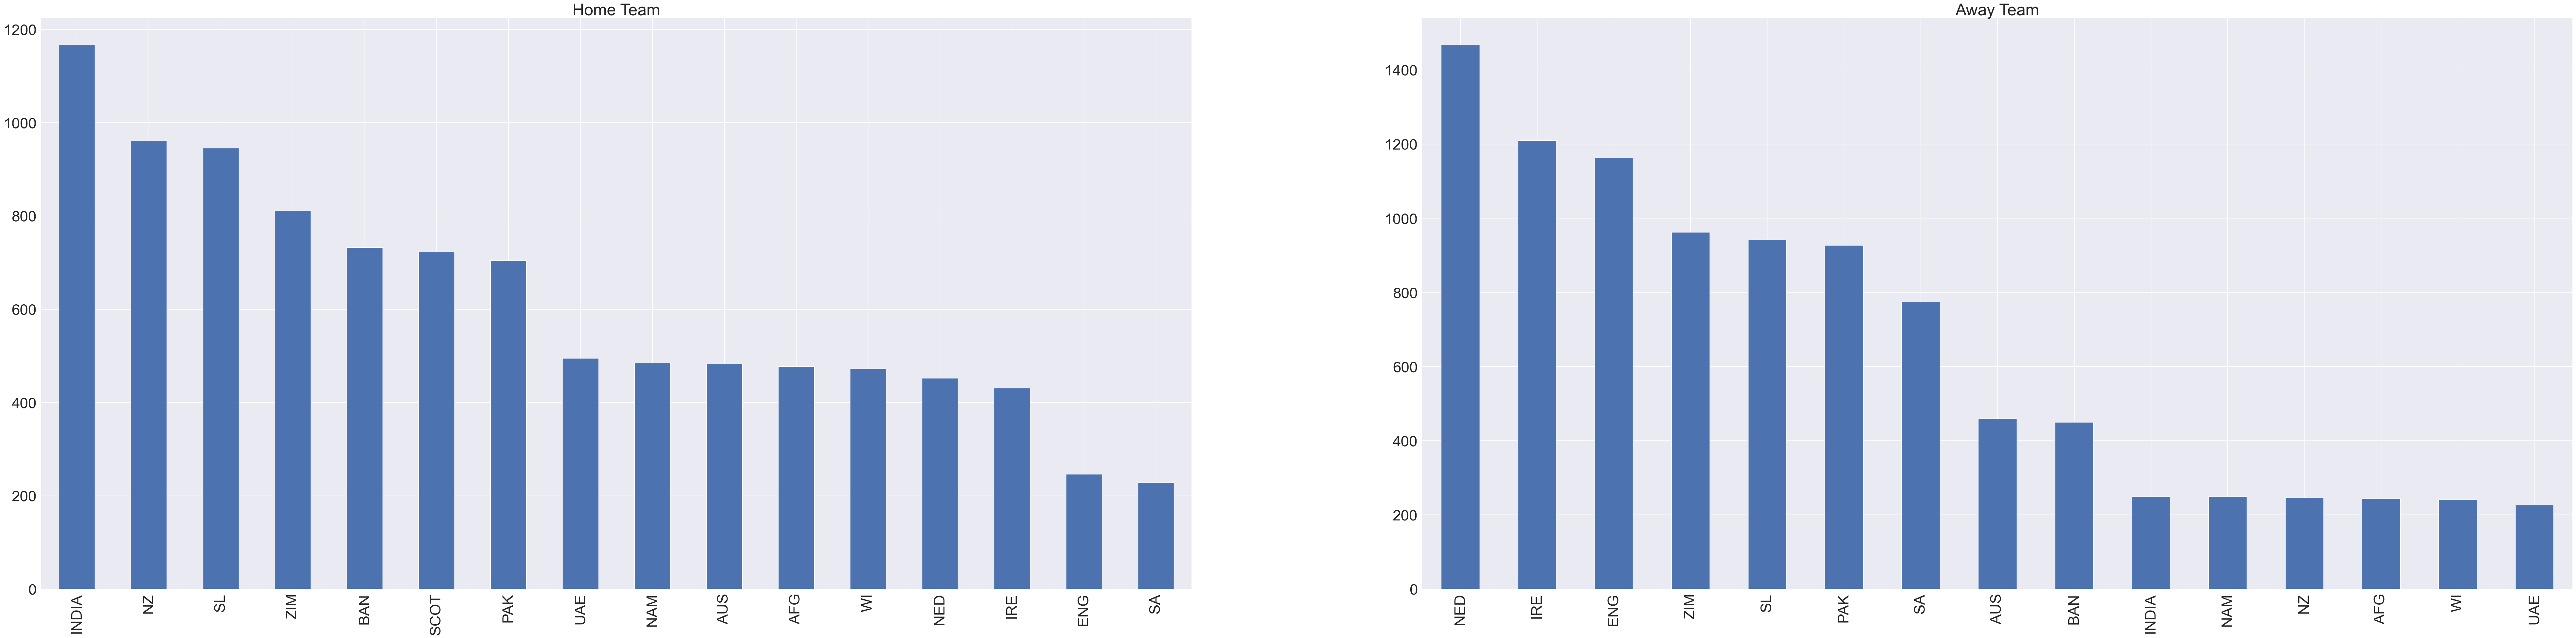

In [22]:
#plotting 'bar graphs' for individual categorial variables

plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(221)
print(df_cat['home_team'].value_counts().plot(kind="bar"))
plt.title('Home Team')
plt.subplot(222)
print(df_cat['away_team'].value_counts().plot(kind="bar"))
plt.title('Away Team')

We can infer that,the Indian team has played most of their matches at their home ground, while the Netherlands team has played most of their matches abroad.

AxesSubplot(0.125,0.53;0.352273x0.35)
AxesSubplot(0.547727,0.53;0.352273x0.35)


Text(0.5, 1.0, '1st bowler')

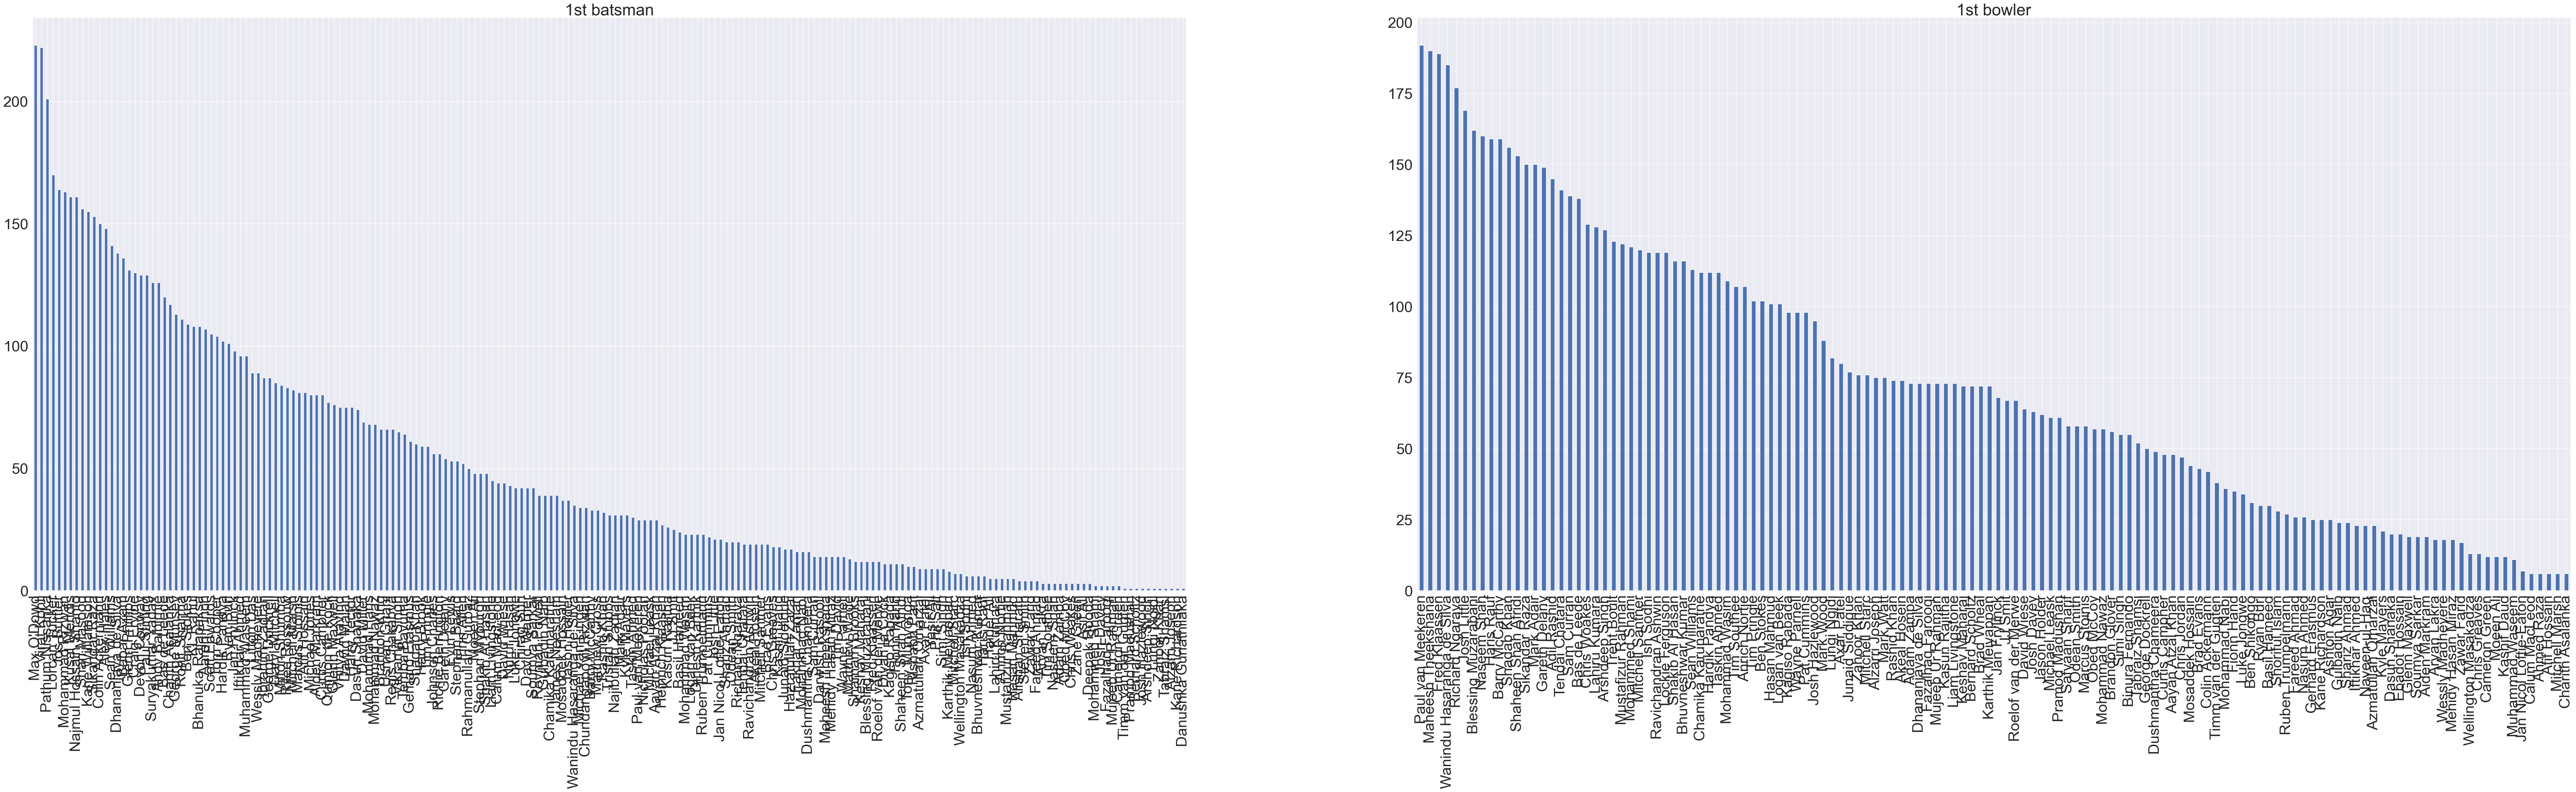

In [23]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(221)
print(df_cat['batsman1_name'].value_counts().plot(kind="bar"))
plt.title('1st batsman')
plt.subplot(222)
print(df_cat['bowler1_name'].value_counts().plot(kind="bar"))
plt.title('1st bowler')

AxesSubplot(0.125,0.53;0.352273x0.35)
AxesSubplot(0.547727,0.53;0.352273x0.35)


Text(0.5, 1.0, '2nd bowler')

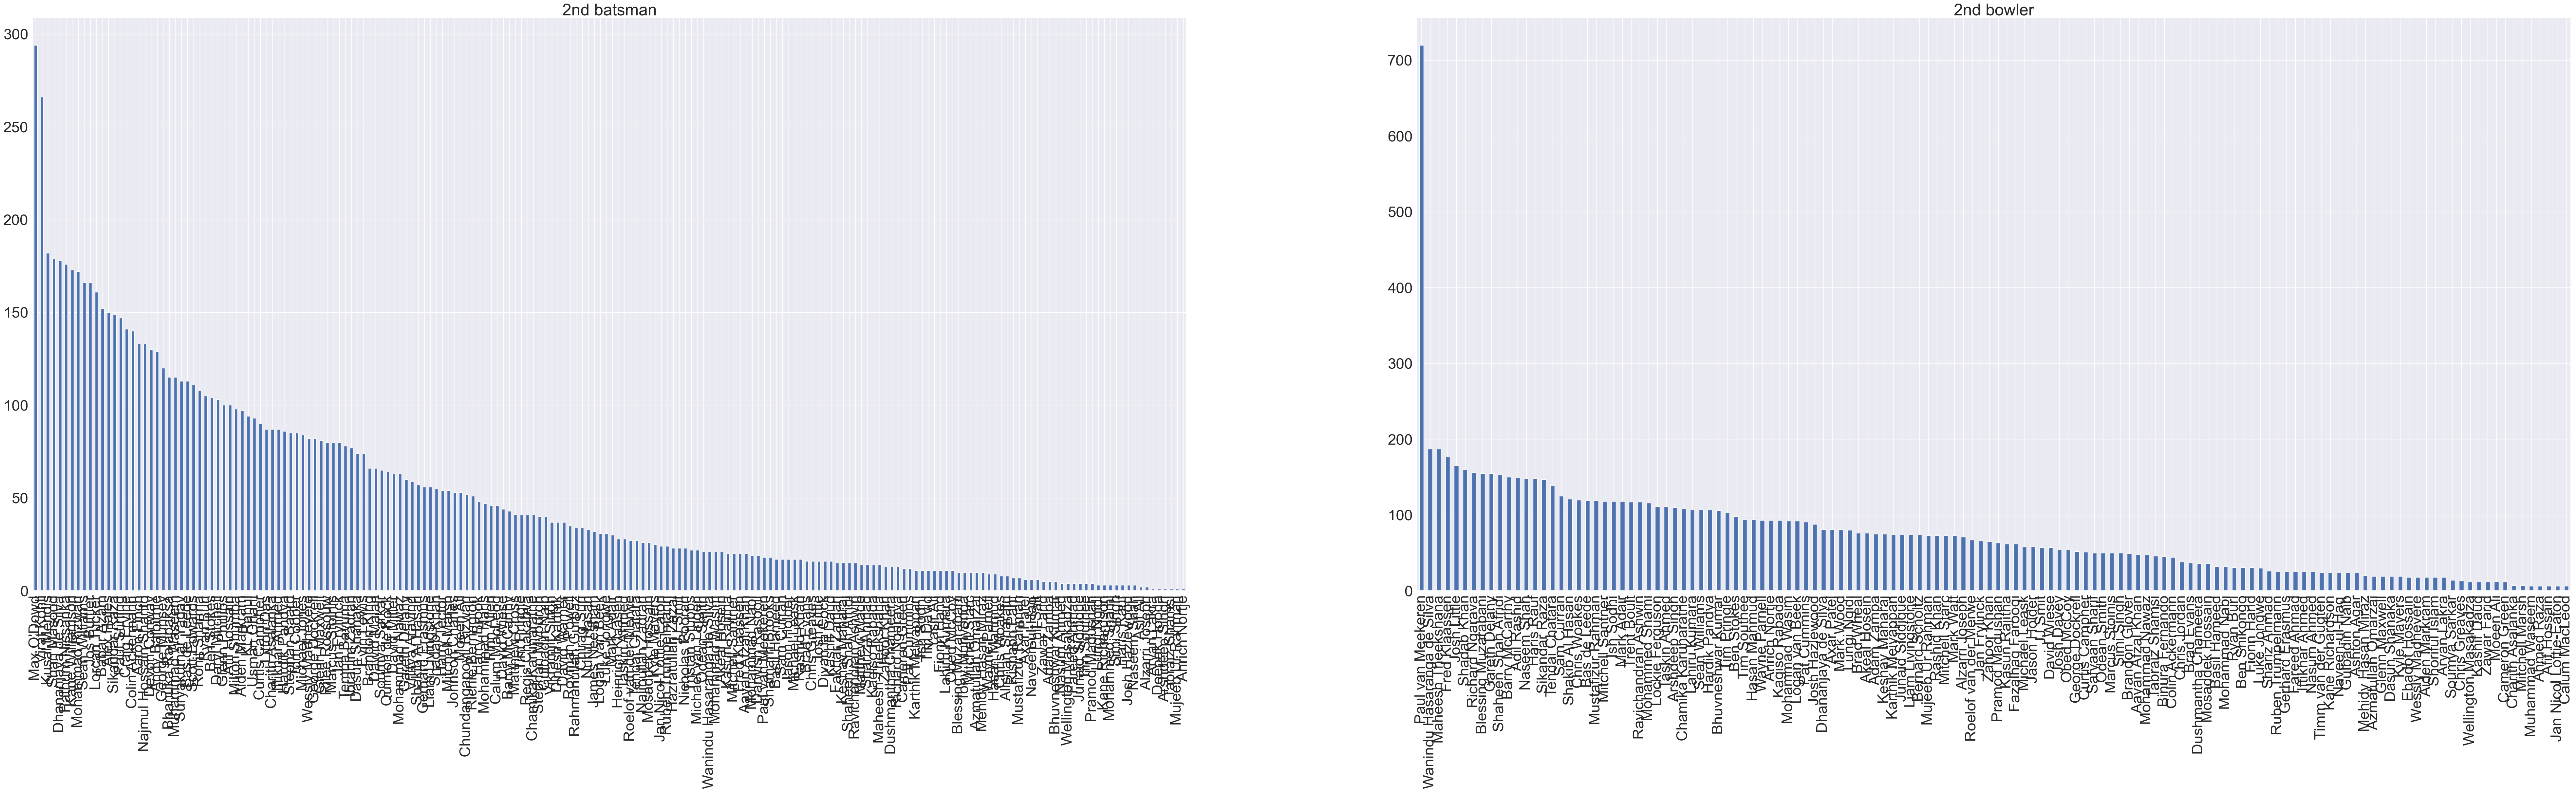

In [24]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(221)
print(df_cat['batsman2_name'].value_counts().plot(kind="bar"))
plt.title('2nd batsman')
plt.subplot(222)
print(df_cat['bowler2_name'].value_counts().plot(kind="bar"))
plt.title('2nd bowler')

The most number of innings were played by batsman Max O'Dawd and were bowled by bowler Paul van Meekeran.

AxesSubplot(0.125,0.653529;0.227941x0.226471)
AxesSubplot(0.398529,0.653529;0.227941x0.226471)
AxesSubplot(0.672059,0.653529;0.227941x0.226471)


Text(0.5, 1.0, 'Boundary or not')

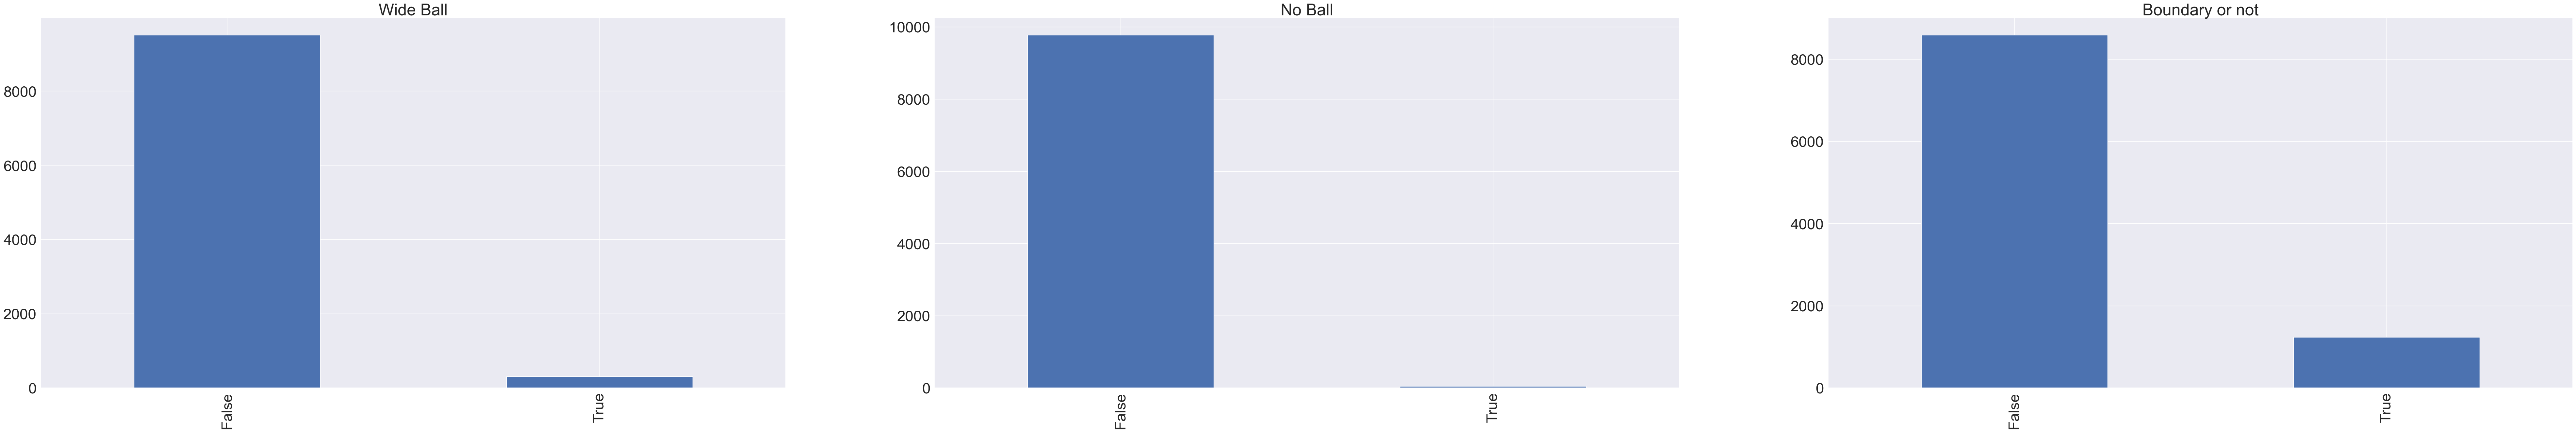

In [25]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(331)
print(df_cat['isWide'].value_counts().plot(kind="bar"))
plt.title('Wide Ball')
plt.subplot(332)
print(df_cat['isNoball'].value_counts().plot(kind="bar"))
plt.title('No Ball')
plt.subplot(333)
print(df_cat['isBoundary'].value_counts().plot(kind="bar"))
plt.title('Boundary or not')

Most deliveries were valid, with no 'no balls', 'no wide' and least boundaries.

AxesSubplot(0.125,0.653529;0.227941x0.226471)
AxesSubplot(0.398529,0.653529;0.227941x0.226471)
AxesSubplot(0.672059,0.653529;0.227941x0.226471)


Text(0.5, 1.0, 'Runs')

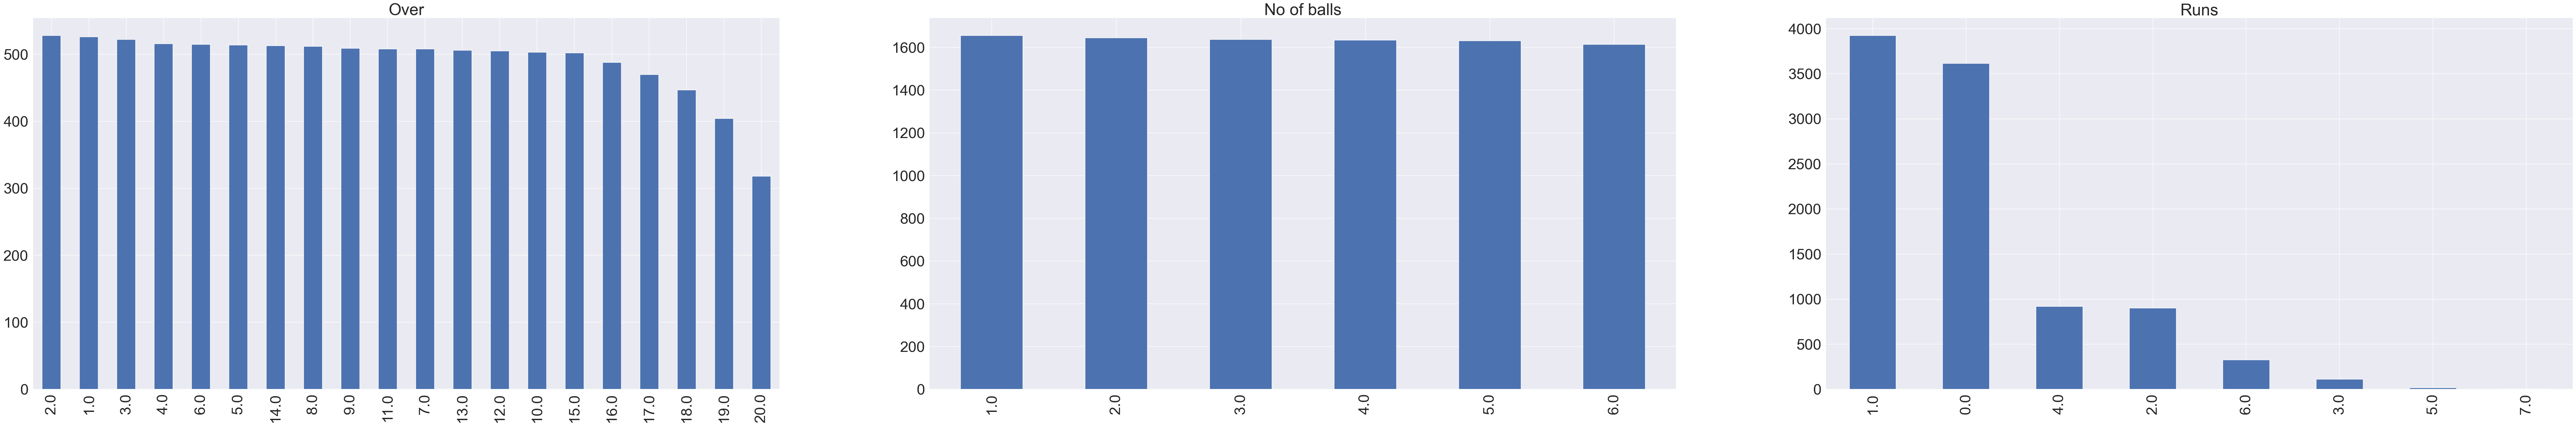

In [26]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(331)
print(df_num['over'].value_counts().plot(kind="bar"))
plt.title('Over')
plt.subplot(332)
print(df_num['ball'].value_counts().plot(kind="bar"))
plt.title('No of balls')
plt.subplot(333)
print(df_num['runs'].value_counts().plot(kind="bar"))
plt.title('Runs')

Most of the bowlers have bowled around 2 overs. A lot of bowlers has given 1 run.

AxesSubplot(0.125,0.53;0.227941x0.35)
AxesSubplot(0.398529,0.53;0.227941x0.35)
AxesSubplot(0.672059,0.53;0.227941x0.35)
AxesSubplot(0.125,0.11;0.227941x0.35)
AxesSubplot(0.398529,0.11;0.227941x0.35)
AxesSubplot(0.672059,0.11;0.227941x0.35)


Text(0.5, 1.0, 'Wickets taken by 1st bowler')

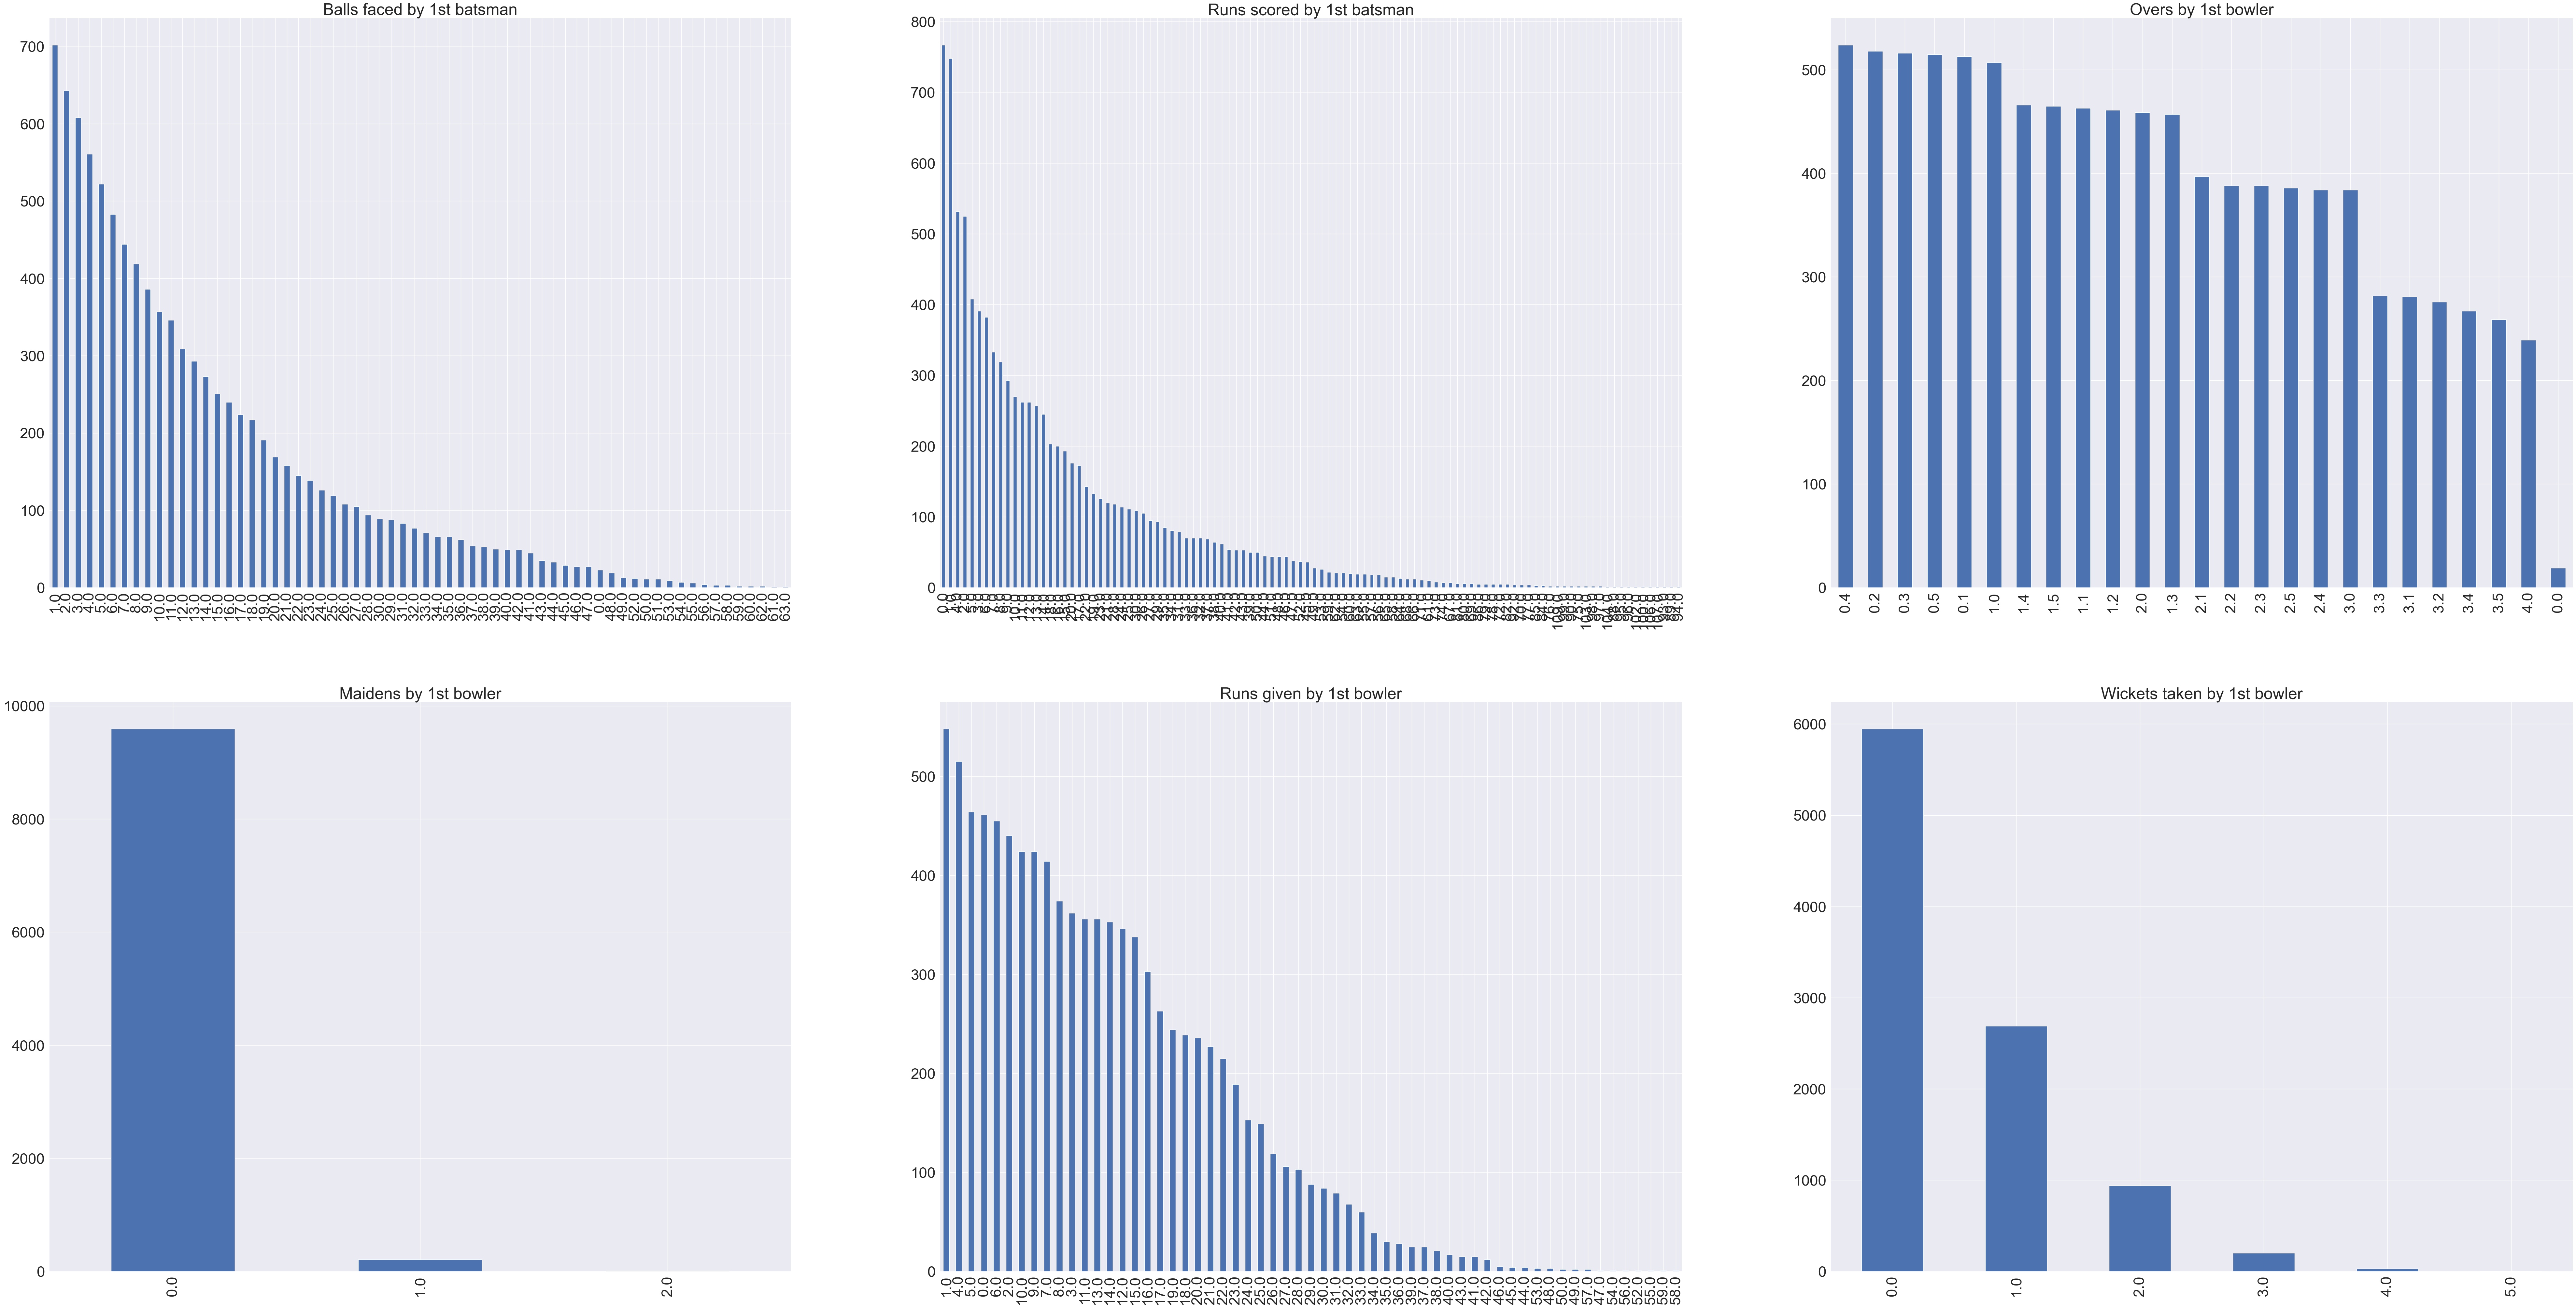

In [27]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(231)
print(df_num['batsman1_balls'].value_counts().plot(kind="bar"))
plt.title('Balls faced by 1st batsman')
plt.subplot(232)
print(df_num['batsman1_runs'].value_counts().plot(kind="bar"))
plt.title('Runs scored by 1st batsman')
plt.subplot(233)
print(df_num['bowler1_overs'].value_counts().plot(kind="bar"))
plt.title('Overs by 1st bowler')
plt.subplot(234)
print(df_num['bowler1_maidens'].value_counts().plot(kind="bar"))
plt.title('Maidens by 1st bowler')
plt.subplot(235)
print(df_num['bowler1_runs'].value_counts().plot(kind="bar"))
plt.title('Runs given by 1st bowler')
plt.subplot(236)
print(df_num['bowler1_wkts'].value_counts().plot(kind="bar"))
plt.title('Wickets taken by 1st bowler')

AxesSubplot(0.125,0.53;0.227941x0.35)
AxesSubplot(0.398529,0.53;0.227941x0.35)
AxesSubplot(0.672059,0.53;0.227941x0.35)
AxesSubplot(0.125,0.11;0.227941x0.35)
AxesSubplot(0.398529,0.11;0.227941x0.35)
AxesSubplot(0.672059,0.11;0.227941x0.35)


Text(0.5, 1.0, 'Wickets taken by 2nd bowler')

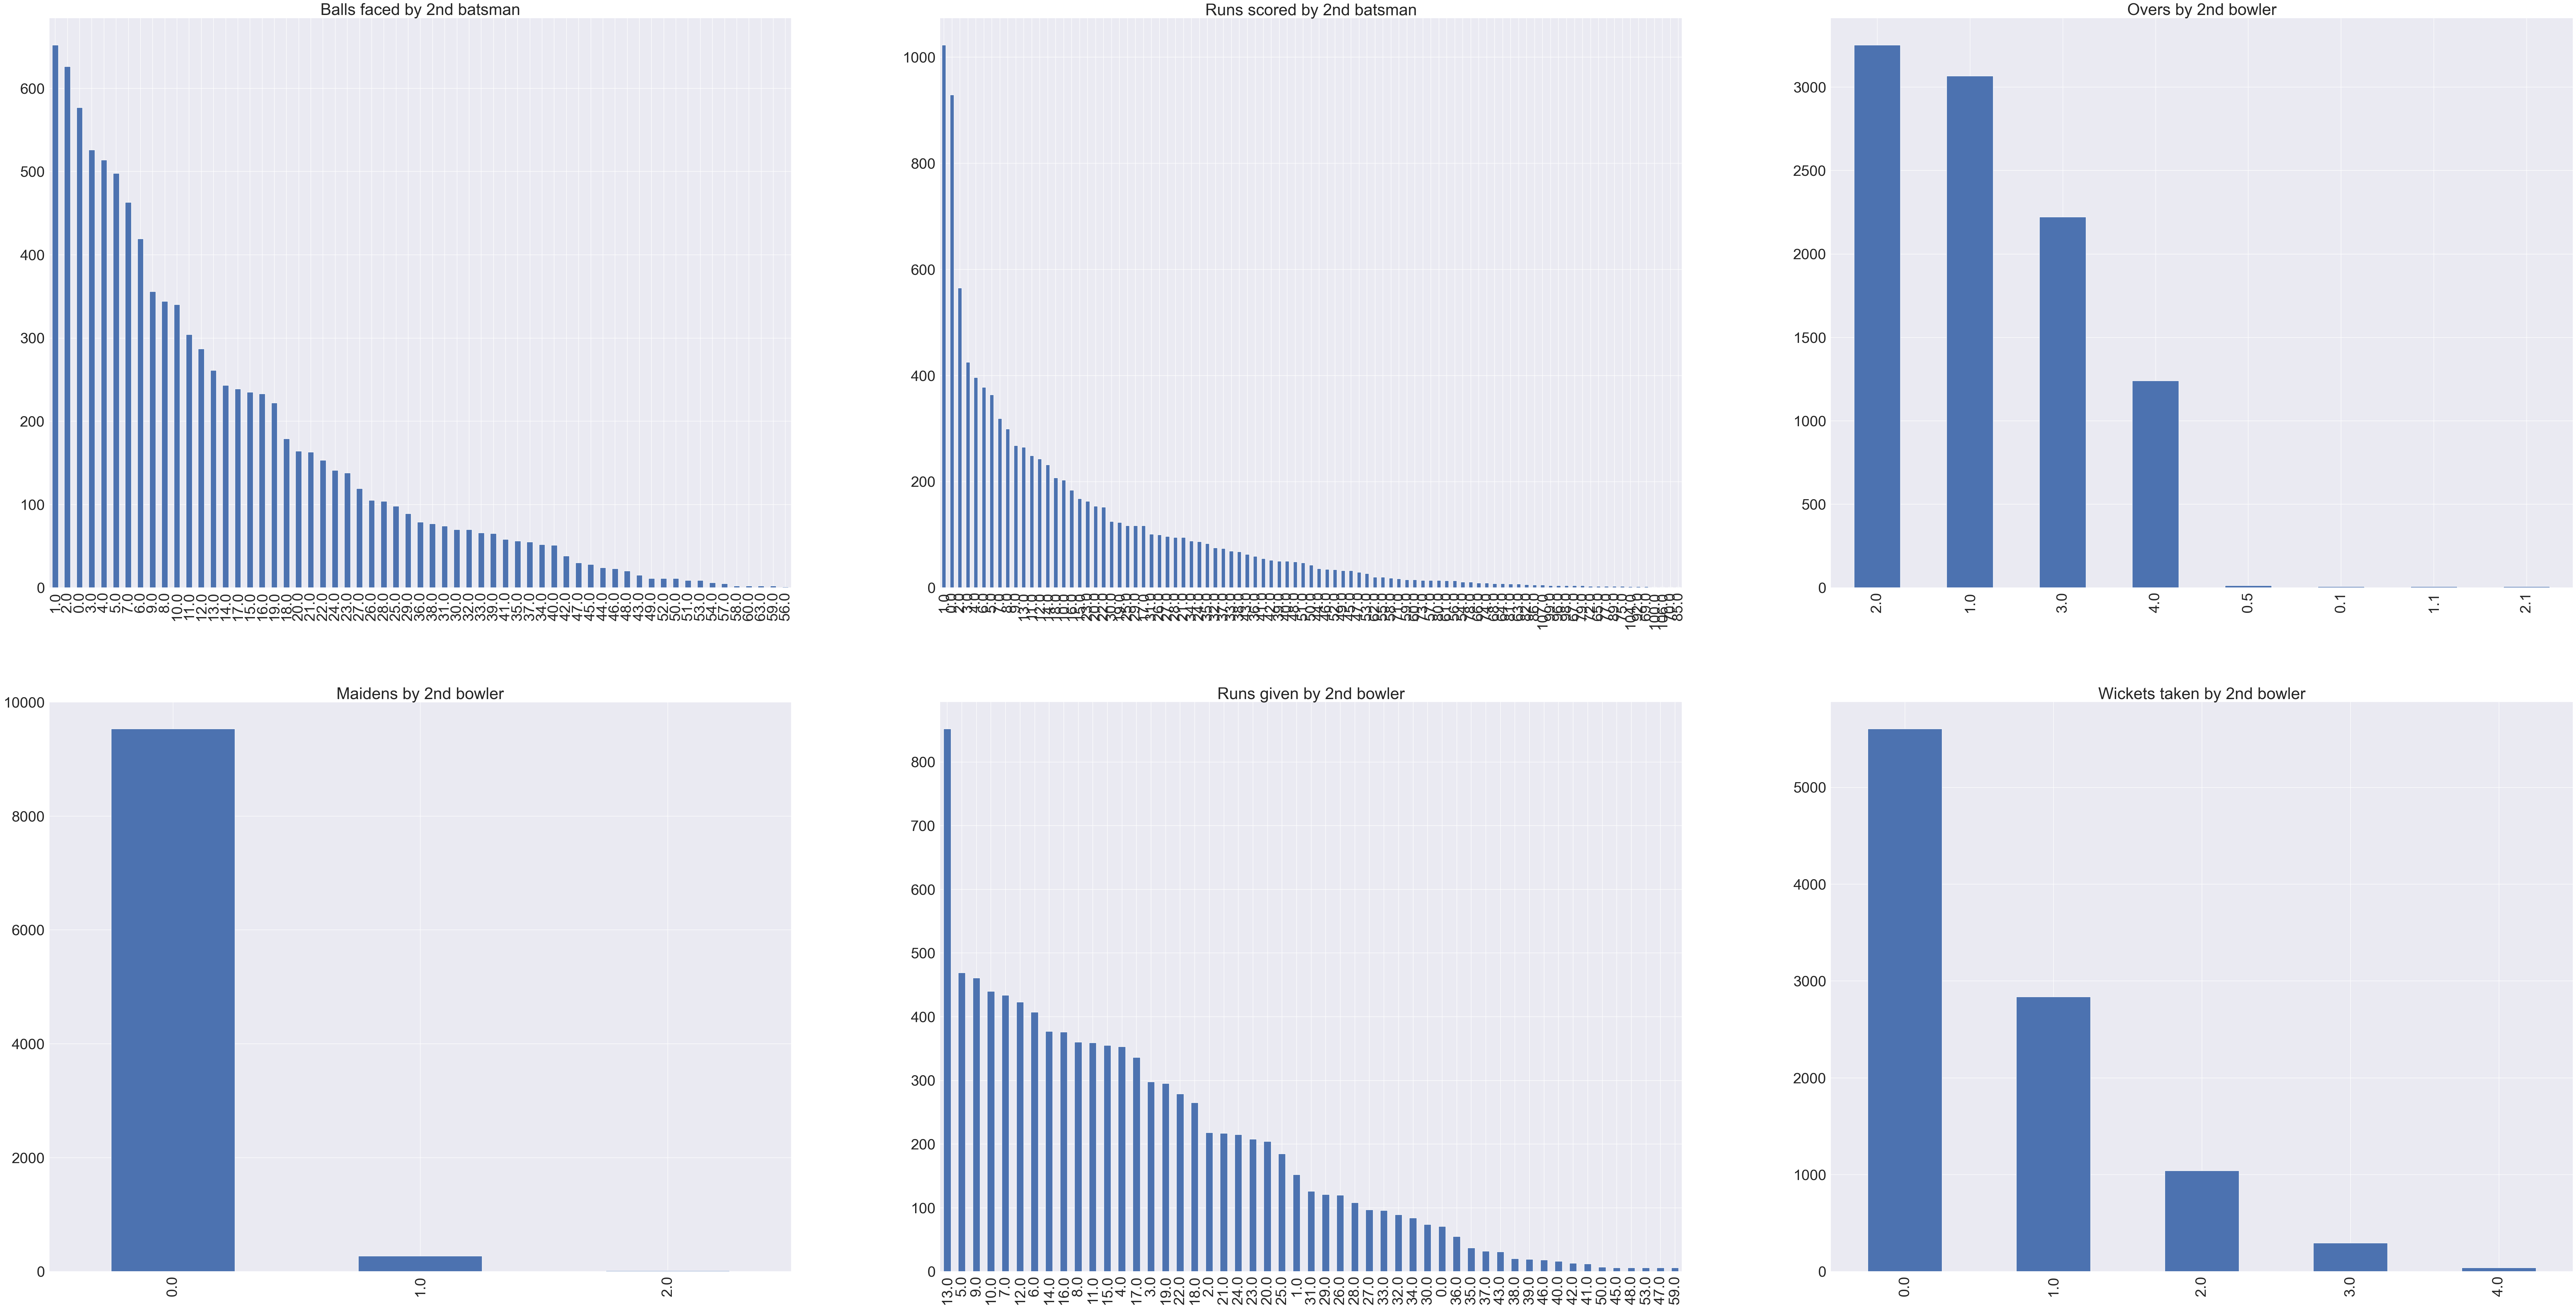

In [28]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 3)
plt.subplot(231)
print(df_num['batsman2_balls'].value_counts().plot(kind="bar"))
plt.title('Balls faced by 2nd batsman')
plt.subplot(232)
print(df_num['batsman2_runs'].value_counts().plot(kind="bar"))
plt.title('Runs scored by 2nd batsman')
plt.subplot(233)
print(df_num['bowler2_overs'].value_counts().plot(kind="bar"))
plt.title('Overs by 2nd bowler')
plt.subplot(234)
print(df_num['bowler2_maidens'].value_counts().plot(kind="bar"))
plt.title('Maidens by 2nd bowler')
plt.subplot(235)
print(df_num['bowler2_runs'].value_counts().plot(kind="bar"))
plt.title('Runs given by 2nd bowler')
plt.subplot(236)
print(df_num['bowler2_wkts'].value_counts().plot(kind="bar"))
plt.title('Wickets taken by 2nd bowler')

We can summarise that, the maximum number of balls faced by both batsman is 63. The maximum runs scored by the 1st batsman is 109 while that by the 2nd batsman is 107. The maximum runs provided by each bowler is 59. While bowler 1, managed to make 1 run per ball, bowler 2 has managed to make more than 5 run per ball in most cases.Bowler 1 has managed to take maximum 5 wickets in the tournament while bowler 2 has 4 managed with 4 wickets.

In [29]:
#using concatenation to frame the new df

fin_df = pd.concat([df_num, df_cat], axis = 1)
fin_df.head()

comment_id       match_id  innings_id     over     ball     runs  \
0  130.000000 1298179.000000    1.000000 1.000000 1.000000 0.000000   
1  120.000000 1298179.000000    1.000000 1.000000 1.000000 1.000000   
2  110.000000 1298179.000000    1.000000 1.000000 1.000000 1.000000   
3  140.000000 1298179.000000    1.000000 1.000000 2.000000 2.000000   
4  150.000000 1298179.000000    1.000000 1.000000 3.000000 0.000000   

    batsman1_id  batsman1_runs  batsman1_balls    bowler1_id  bowler1_overs  \
0 323389.000000       0.000000        2.000000 311158.000000       0.100000   
1 323389.000000       0.000000        1.000000 311158.000000       0.000000   
2 323389.000000       0.000000        1.000000 311158.000000       0.000000   
3 323389.000000       2.000000        3.000000 311158.000000       0.200000   
4 323389.000000       2.000000        4.000000 311158.000000       0.300000   

   bowler1_maidens  bowler1_runs  bowler1_wkts   batsman2_id  batsman2_runs  \
0         0.000000      2.000000      0.000000 348144.000000       0.000000   
1         0.000000      2.000000      0.000000 348144.000000       0.000000   
2         0.000000      1.000000      0.000000 348144.000000       0.000000   
3         0.000000      4.000000      0.000000 348144.000000       0.000000   
4         0.000000      4.000000      0.000000 348144.000000       0.000000   

   batsman2_balls    bowler2_id  bowler2_overs  bowler2_maidens  bowler2_runs  \
0        0.000000 542023.000000       2.000000         0.000000     13.000000   
1        0.000000 542023.000000       2.000000         0.000000     13.000000   
2        0.000000 542023.000000       2.000000         0.000000     13.000000   
3        0.000000 542023.000000       2.000000         0.000000     13.000000   
4        0.000000 542023.000000       2.000000         0.000000     13.000000   

   bowler2_wkts match_name home_team away_team current_innings  \
0      0.000000  ENG v PAK       PAK       ENG             PAK   
1      0.000000  ENG v PAK       PAK       ENG             PAK   
2      0.000000  ENG v PAK       PAK       ENG             PAK   
3      0.000000  ENG v PAK       PAK       ENG             PAK   
4      0.000000  ENG v PAK       PAK       ENG             PAK   

                              shortText isBoundary isWide isNoball  \
0     Stokes to Mohammad Rizwan, no run      False  False    False   
1     Stokes to Mohammad Rizwan, 1 wide      False   True    False   
2  Stokes to Mohammad Rizwan, 1 no ball      False  False     True   
3     Stokes to Mohammad Rizwan, 2 runs      False  False    False   
4     Stokes to Mohammad Rizwan, no run      False  False    False   

     batsman1_name bowler1_name batsman2_name       bowler2_name  \
0  Mohammad Rizwan   Ben Stokes    Babar Azam  Paul van Meekeren   
1  Mohammad Rizwan   Ben Stokes    Babar Azam  Paul van Meekeren   
2  Mohammad Rizwan   Ben Stokes    Babar Azam  Paul van Meekeren   
3  Mohammad Rizwan   Ben Stokes    Babar Azam  Paul van Meekeren   
4  Mohammad Rizwan   Ben Stokes    Babar Azam  Paul van Meekeren   

  isRetiredHurt                                               text  
0         False  short again, and he gets some extra bounce on ...  
1         False  and he'll have to bowl another free-hit after ...  
2         False  full, and a hint of shape away from off stump....  
3         False  shortish, angling down leg, gloves a pull down...  
4         False  length ball close to off stump, straightens a ...

Text(0.5, 1.0, 'Home team with runs')

<Figure size 10000x5000 with 0 Axes>

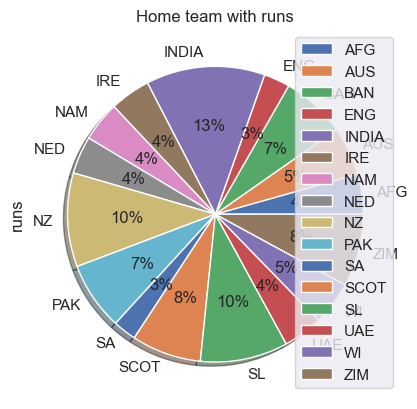

In [30]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 1)
fin_df.groupby(['home_team']).sum().plot( kind='pie', y='runs', autopct='%1.0f%%', shadow=True) 
plt.title('Home team with runs')

Text(0.5, 1.0, 'Home team with overs')

<Figure size 10000x5000 with 0 Axes>

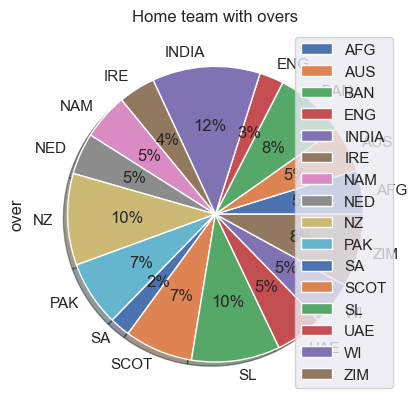

In [31]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 1)
fin_df.groupby(['home_team']).sum().plot( kind='pie', y='over', autopct='%1.0f%%', shadow=True) 
plt.title('Home team with overs')

Text(0.5, 1.0, 'Away team with runs')

<Figure size 10000x5000 with 0 Axes>

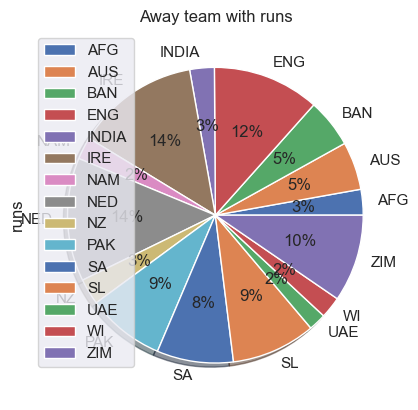

In [32]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 1)
fin_df.groupby(['away_team']).sum().plot( kind='pie', y='runs', autopct='%1.0f%%', shadow=True) 
plt.title('Away team with runs')

Text(0.5, 1.0, 'Away team with overs')

<Figure size 10000x5000 with 0 Axes>

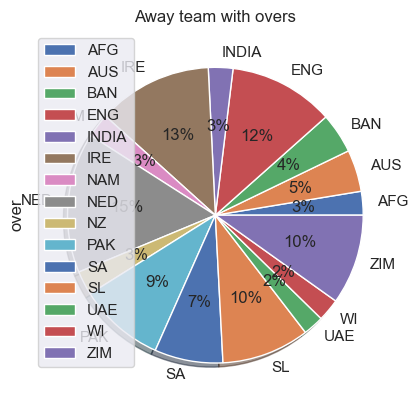

In [33]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 1)
fin_df.groupby(['away_team']).sum().plot( kind='pie', y='over', autopct='%1.0f%%', shadow=True) 
plt.title('Away team with overs')

Team Indian has played maximum overs and scored maximum runs in their home ground, while Team Ireland has scored maximum runs and played maximum overs abroad, in the entire tournament.

## Multivariate analysis

In [34]:
pd.pivot_table(fin_df, index=["home_team", "away_team"], columns=["runs"], aggfunc=[np.sum])

sum                                             \
                          ball                                              
runs                  0.000000   1.000000   2.000000  3.000000   4.000000   
home_team away_team                                                         
AFG       ENG       372.000000 301.000000  87.000000  2.000000  47.000000   
          SL        279.000000 365.000000  90.000000 11.000000  66.000000   
AUS       AFG       329.000000 273.000000  72.000000 17.000000 112.000000   
          IRE       307.000000 328.000000  82.000000  6.000000  81.000000   
BAN       NED       339.000000 373.000000  68.000000  6.000000  72.000000   
          PAK       306.000000 332.000000  97.000000       NaN  65.000000   
          ZIM       274.000000 394.000000  83.000000  1.000000 101.000000   
ENG       NZ        273.000000 332.000000 119.000000 17.000000  88.000000   
INDIA     BAN       260.000000 291.000000  78.000000  3.000000 103.000000   
          ENG       257.000000 309.000000  49.000000  3.000000  99.000000   
          NED       323.000000 322.000000 113.000000  6.000000  77.000000   
          SA        376.000000 304.000000  48.000000  4.000000  74.000000   
          ZIM       314.000000 300.000000  59.000000 10.000000  99.000000   
IRE       ENG       252.000000 329.000000  73.000000 16.000000  67.000000   
          SL        218.000000 376.000000  55.000000 12.000000  68.000000   
NAM       NED       326.000000 358.000000  91.000000 10.000000  43.000000   
          SL        288.000000 391.000000  80.000000  6.000000  45.000000   
NED       PAK       326.000000 255.000000  65.000000 20.000000  50.000000   
          SA        314.000000 350.000000  93.000000  8.000000  72.000000   
NZ        AUS       252.000000 366.000000  65.000000  5.000000  80.000000   
          IRE       246.000000 343.000000 109.000000 11.000000  99.000000   
          PAK       207.000000 399.000000 118.000000 11.000000  80.000000   
          SL        396.000000 299.000000  62.000000 13.000000  57.000000   
PAK       ENG       325.000000 327.000000  73.000000 25.000000  73.000000   
          INDIA     320.000000 319.000000  88.000000 30.000000  70.000000   
          SA        293.000000 238.000000  59.000000 10.000000  94.000000   
SA        BAN       282.000000 322.000000  62.000000       NaN  64.000000   
SCOT      IRE       224.000000 374.000000  91.000000 10.000000 133.000000   
          WI        308.000000 370.000000  56.000000       NaN 101.000000   
          ZIM       284.000000 369.000000  67.000000 13.000000  81.000000   
SL        AUS       256.000000 323.000000  64.000000  7.000000  88.000000   
          ENG       296.000000 363.000000  86.000000  6.000000  71.000000   
          NED       321.000000 290.000000 104.000000 18.000000  77.000000   
          UAE       369.000000 272.000000  72.000000  4.000000  59.000000   
UAE       NAM       333.000000 347.000000  92.000000  7.000000  44.000000   
          NED       344.000000 383.000000  50.000000 19.000000  37.000000   
WI        IRE       296.000000 342.000000  53.000000  5.000000  69.000000   
          ZIM       312.000000 354.000000  63.000000  5.000000  73.000000   
ZIM       IRE       295.000000 359.000000  89.000000  5.000000  83.000000   
          NED       407.000000 274.000000  42.000000  4.000000  75.000000   
          PAK       368.000000 363.000000  55.000000  6.000000  65.000000   
          SA         84.000000  88.000000  30.000000 12.000000  46.000000   

                                                                            \
                                                batsman1_balls               
runs                5.000000  6.000000 7.000000       0.000000    1.000000   
home_team away_team                                                          
AFG       ENG       6.000000 13.000000      NaN    1030.000000 1067.000000   
          SL        6.000000 21.000000      NaN     890.000000 1165.000000   
AUS       AFG   

We are creating a pivot table and compared the runs cored by home team and way team for the tournament.

In [35]:
#using Label encoder
from sklearn.preprocessing import LabelEncoder
fin_df[['match_name', 'home_team', 'away_team', 'current_innings', 'shortText','isBoundary', 'isWide', 'isNoball', 'batsman1_name', 'bowler1_name',
       'batsman2_name', 'bowler2_name', 'isRetiredHurt', 'text']] = fin_df[['match_name', 'home_team', 'away_team', 'current_innings', 'shortText','isBoundary', 'isWide', 'isNoball', 'batsman1_name', 'bowler1_name',
       'batsman2_name', 'bowler2_name', 'isRetiredHurt', 'text']].apply(LabelEncoder().fit_transform)
fin_df.head()

comment_id       match_id  innings_id     over     ball     runs  \
0  130.000000 1298179.000000    1.000000 1.000000 1.000000 0.000000   
1  120.000000 1298179.000000    1.000000 1.000000 1.000000 1.000000   
2  110.000000 1298179.000000    1.000000 1.000000 1.000000 1.000000   
3  140.000000 1298179.000000    1.000000 1.000000 2.000000 2.000000   
4  150.000000 1298179.000000    1.000000 1.000000 3.000000 0.000000   

    batsman1_id  batsman1_runs  batsman1_balls    bowler1_id  bowler1_overs  \
0 323389.000000       0.000000        2.000000 311158.000000       0.100000   
1 323389.000000       0.000000        1.000000 311158.000000       0.000000   
2 323389.000000       0.000000        1.000000 311158.000000       0.000000   
3 323389.000000       2.000000        3.000000 311158.000000       0.200000   
4 323389.000000       2.000000        4.000000 311158.000000       0.300000   

   bowler1_maidens  bowler1_runs  bowler1_wkts   batsman2_id  batsman2_runs  \
0         0.000000      2.000000      0.000000 348144.000000       0.000000   
1         0.000000      2.000000      0.000000 348144.000000       0.000000   
2         0.000000      1.000000      0.000000 348144.000000       0.000000   
3         0.000000      4.000000      0.000000 348144.000000       0.000000   
4         0.000000      4.000000      0.000000 348144.000000       0.000000   

   batsman2_balls    bowler2_id  bowler2_overs  bowler2_maidens  bowler2_runs  \
0        0.000000 542023.000000       2.000000         0.000000     13.000000   
1        0.000000 542023.000000       2.000000         0.000000     13.000000   
2        0.000000 542023.000000       2.000000         0.000000     13.000000   
3        0.000000 542023.000000       2.000000         0.000000     13.000000   
4        0.000000 542023.000000       2.000000         0.000000     13.000000   

   bowler2_wkts  match_name  home_team  away_team  current_innings  shortText  \
0      0.000000          14          9          3                9       4909   
1      0.000000          14          9          3                9       4907   
2      0.000000          14          9          3                9       4905   
3      0.000000          14          9          3                9       4908   
4      0.000000          14          9          3                9       4909   

   isBoundary  isWide  isNoball  batsman1_name  bowler1_name  batsman2_name  \
0           0       0         0            123            18             16   
1           0       1         0            123            18             16   
2           0       0         1            123            18             16   
3           0       0         0            123            18             16   
4           0       0         0            123            18             16   

   bowler2_name  isRetiredHurt  text  
0           100              0  8032  
1           100              0  3691  
2           100              0  5759  
3           100              0  8533  
4           100              0  6815

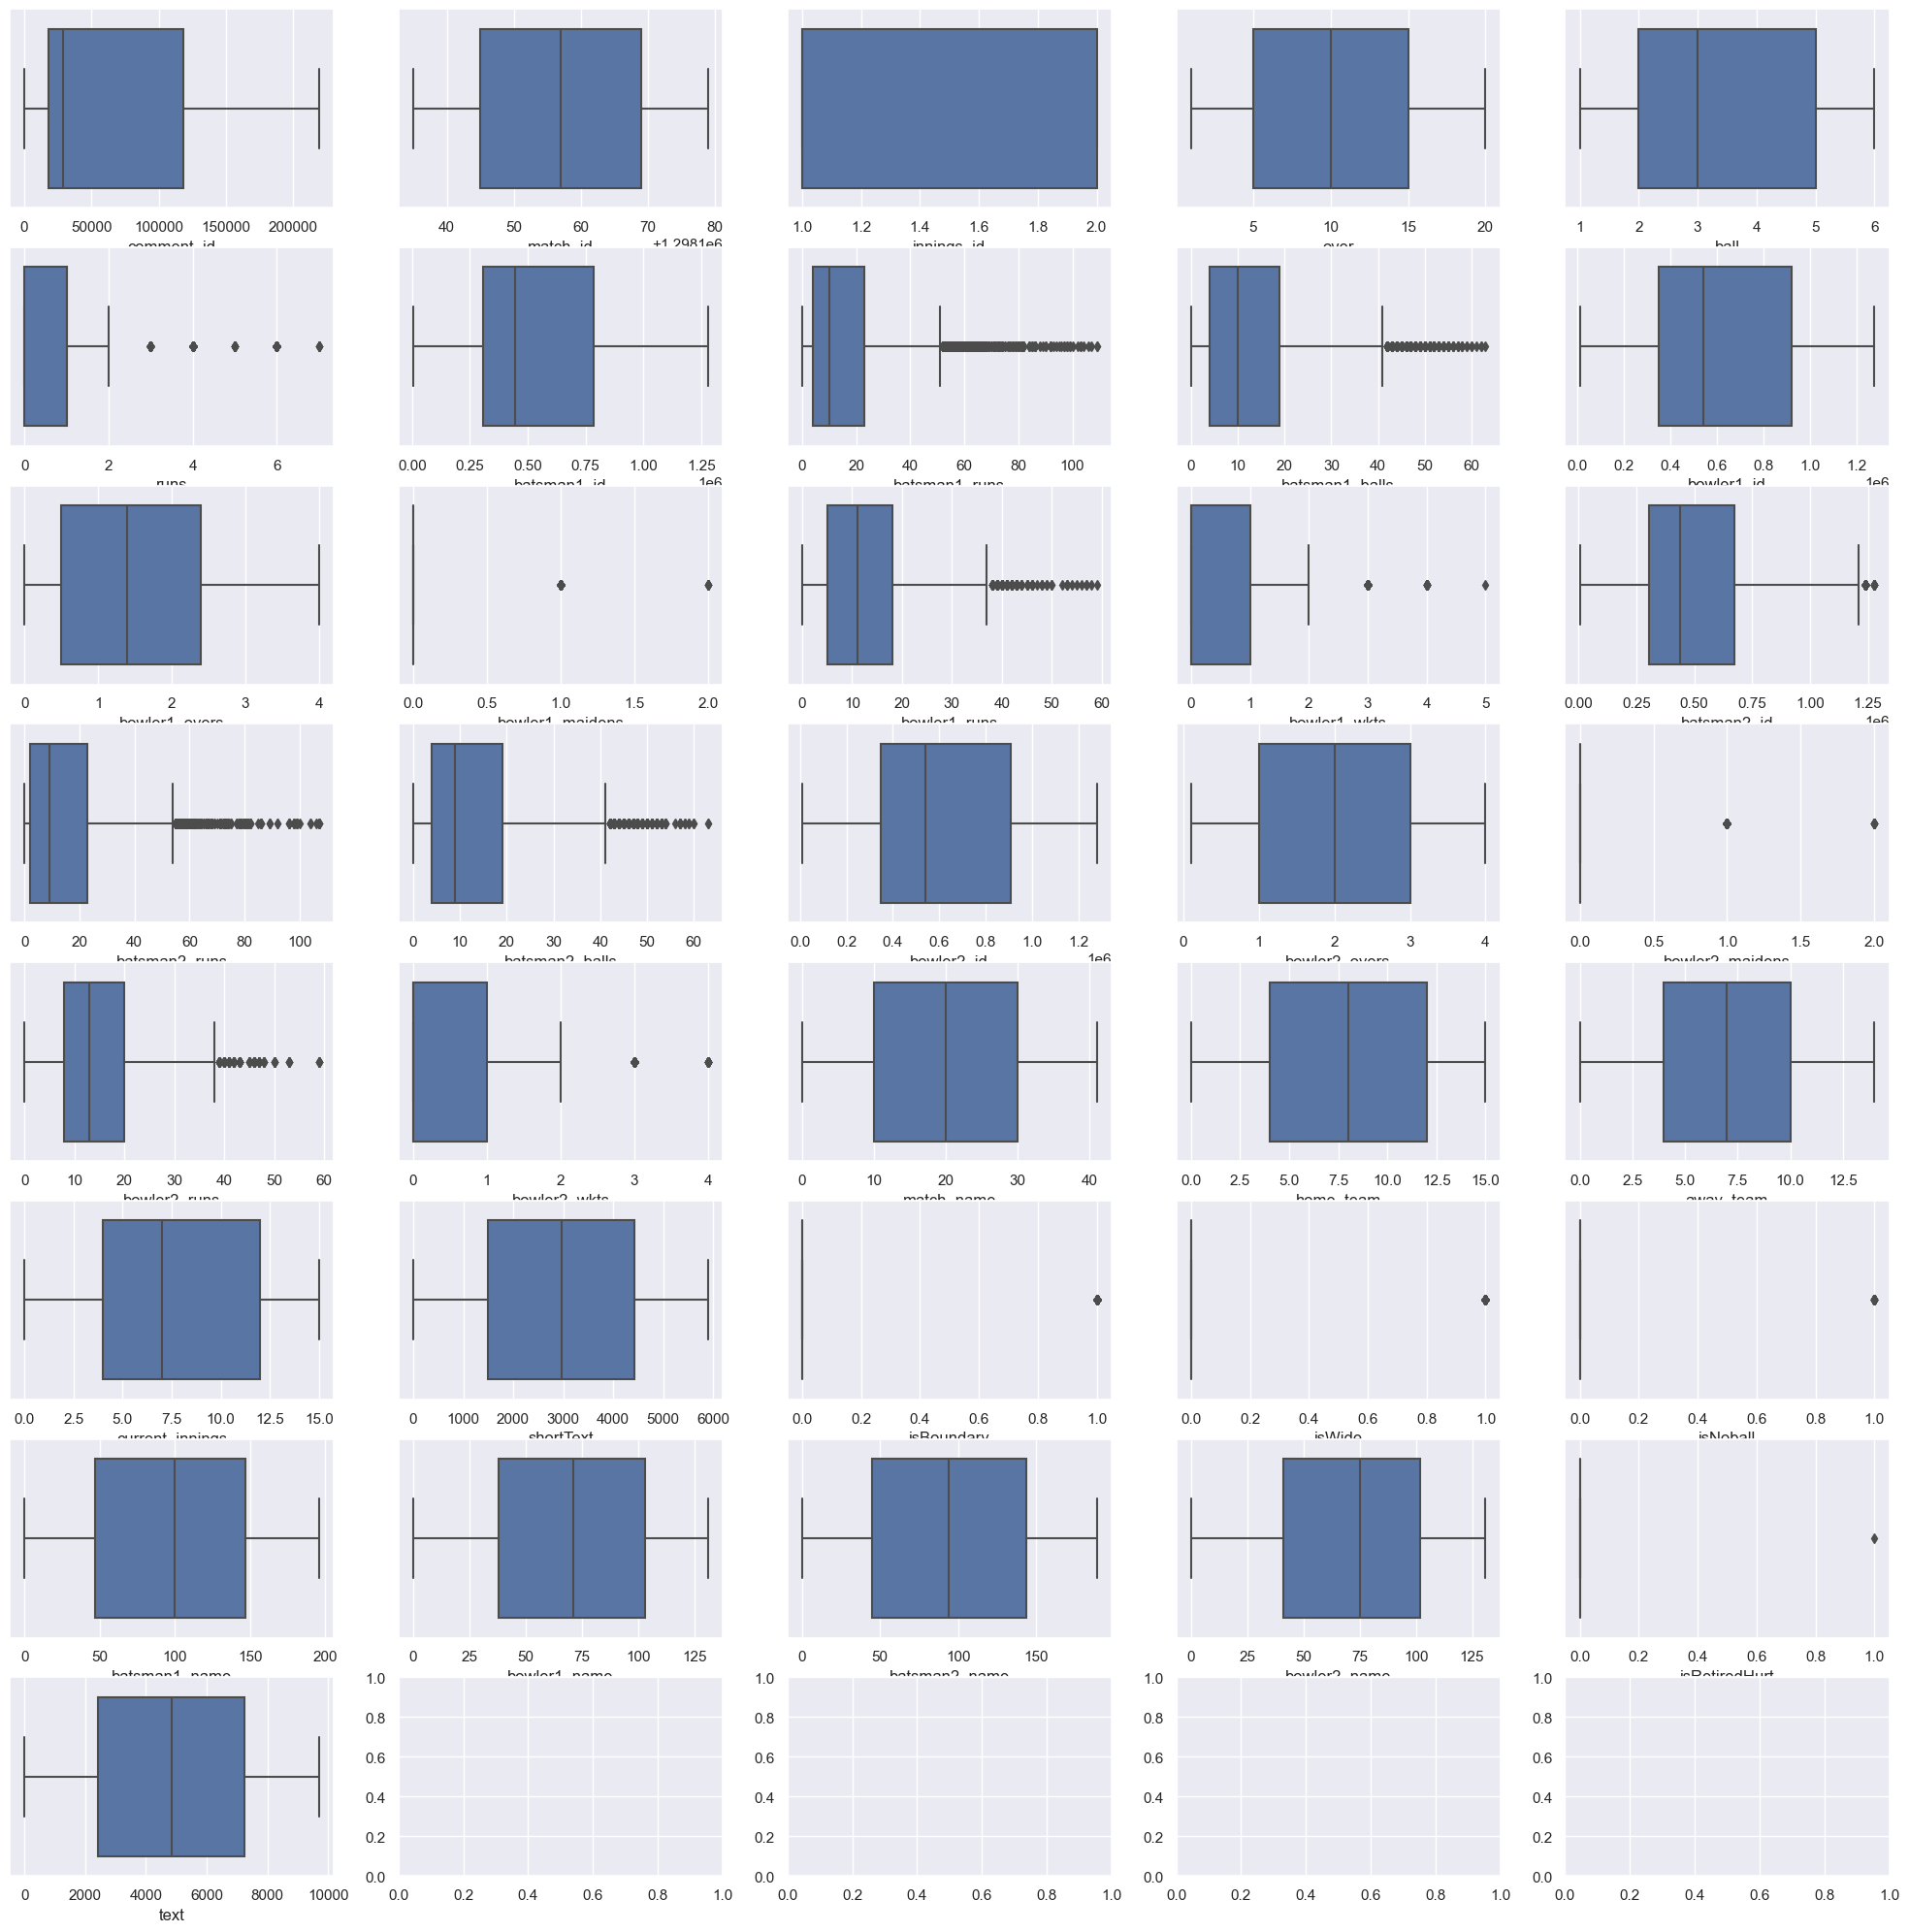

In [36]:
#plotting box plots for outlier detection

fig,ax = plt.subplots(8,5,figsize=(25,25))
sns.set(font_scale = 1)
for var,subplot in zip(fin_df.columns,ax.flatten()):
    sns.set(font_scale = 1)
    sns.boxplot(fin_df[var],ax=subplot)
    
plt.show()

In [37]:
# detecting and capping the outliers

for col in df_num.columns:
    percentiles = fin_df[col].quantile([0.01,0.99]).values
    fin_df[col][fin_df[col] <= percentiles[0]] = percentiles[0]
    fin_df[col][fin_df[col] >= percentiles[1]] = percentiles[1]

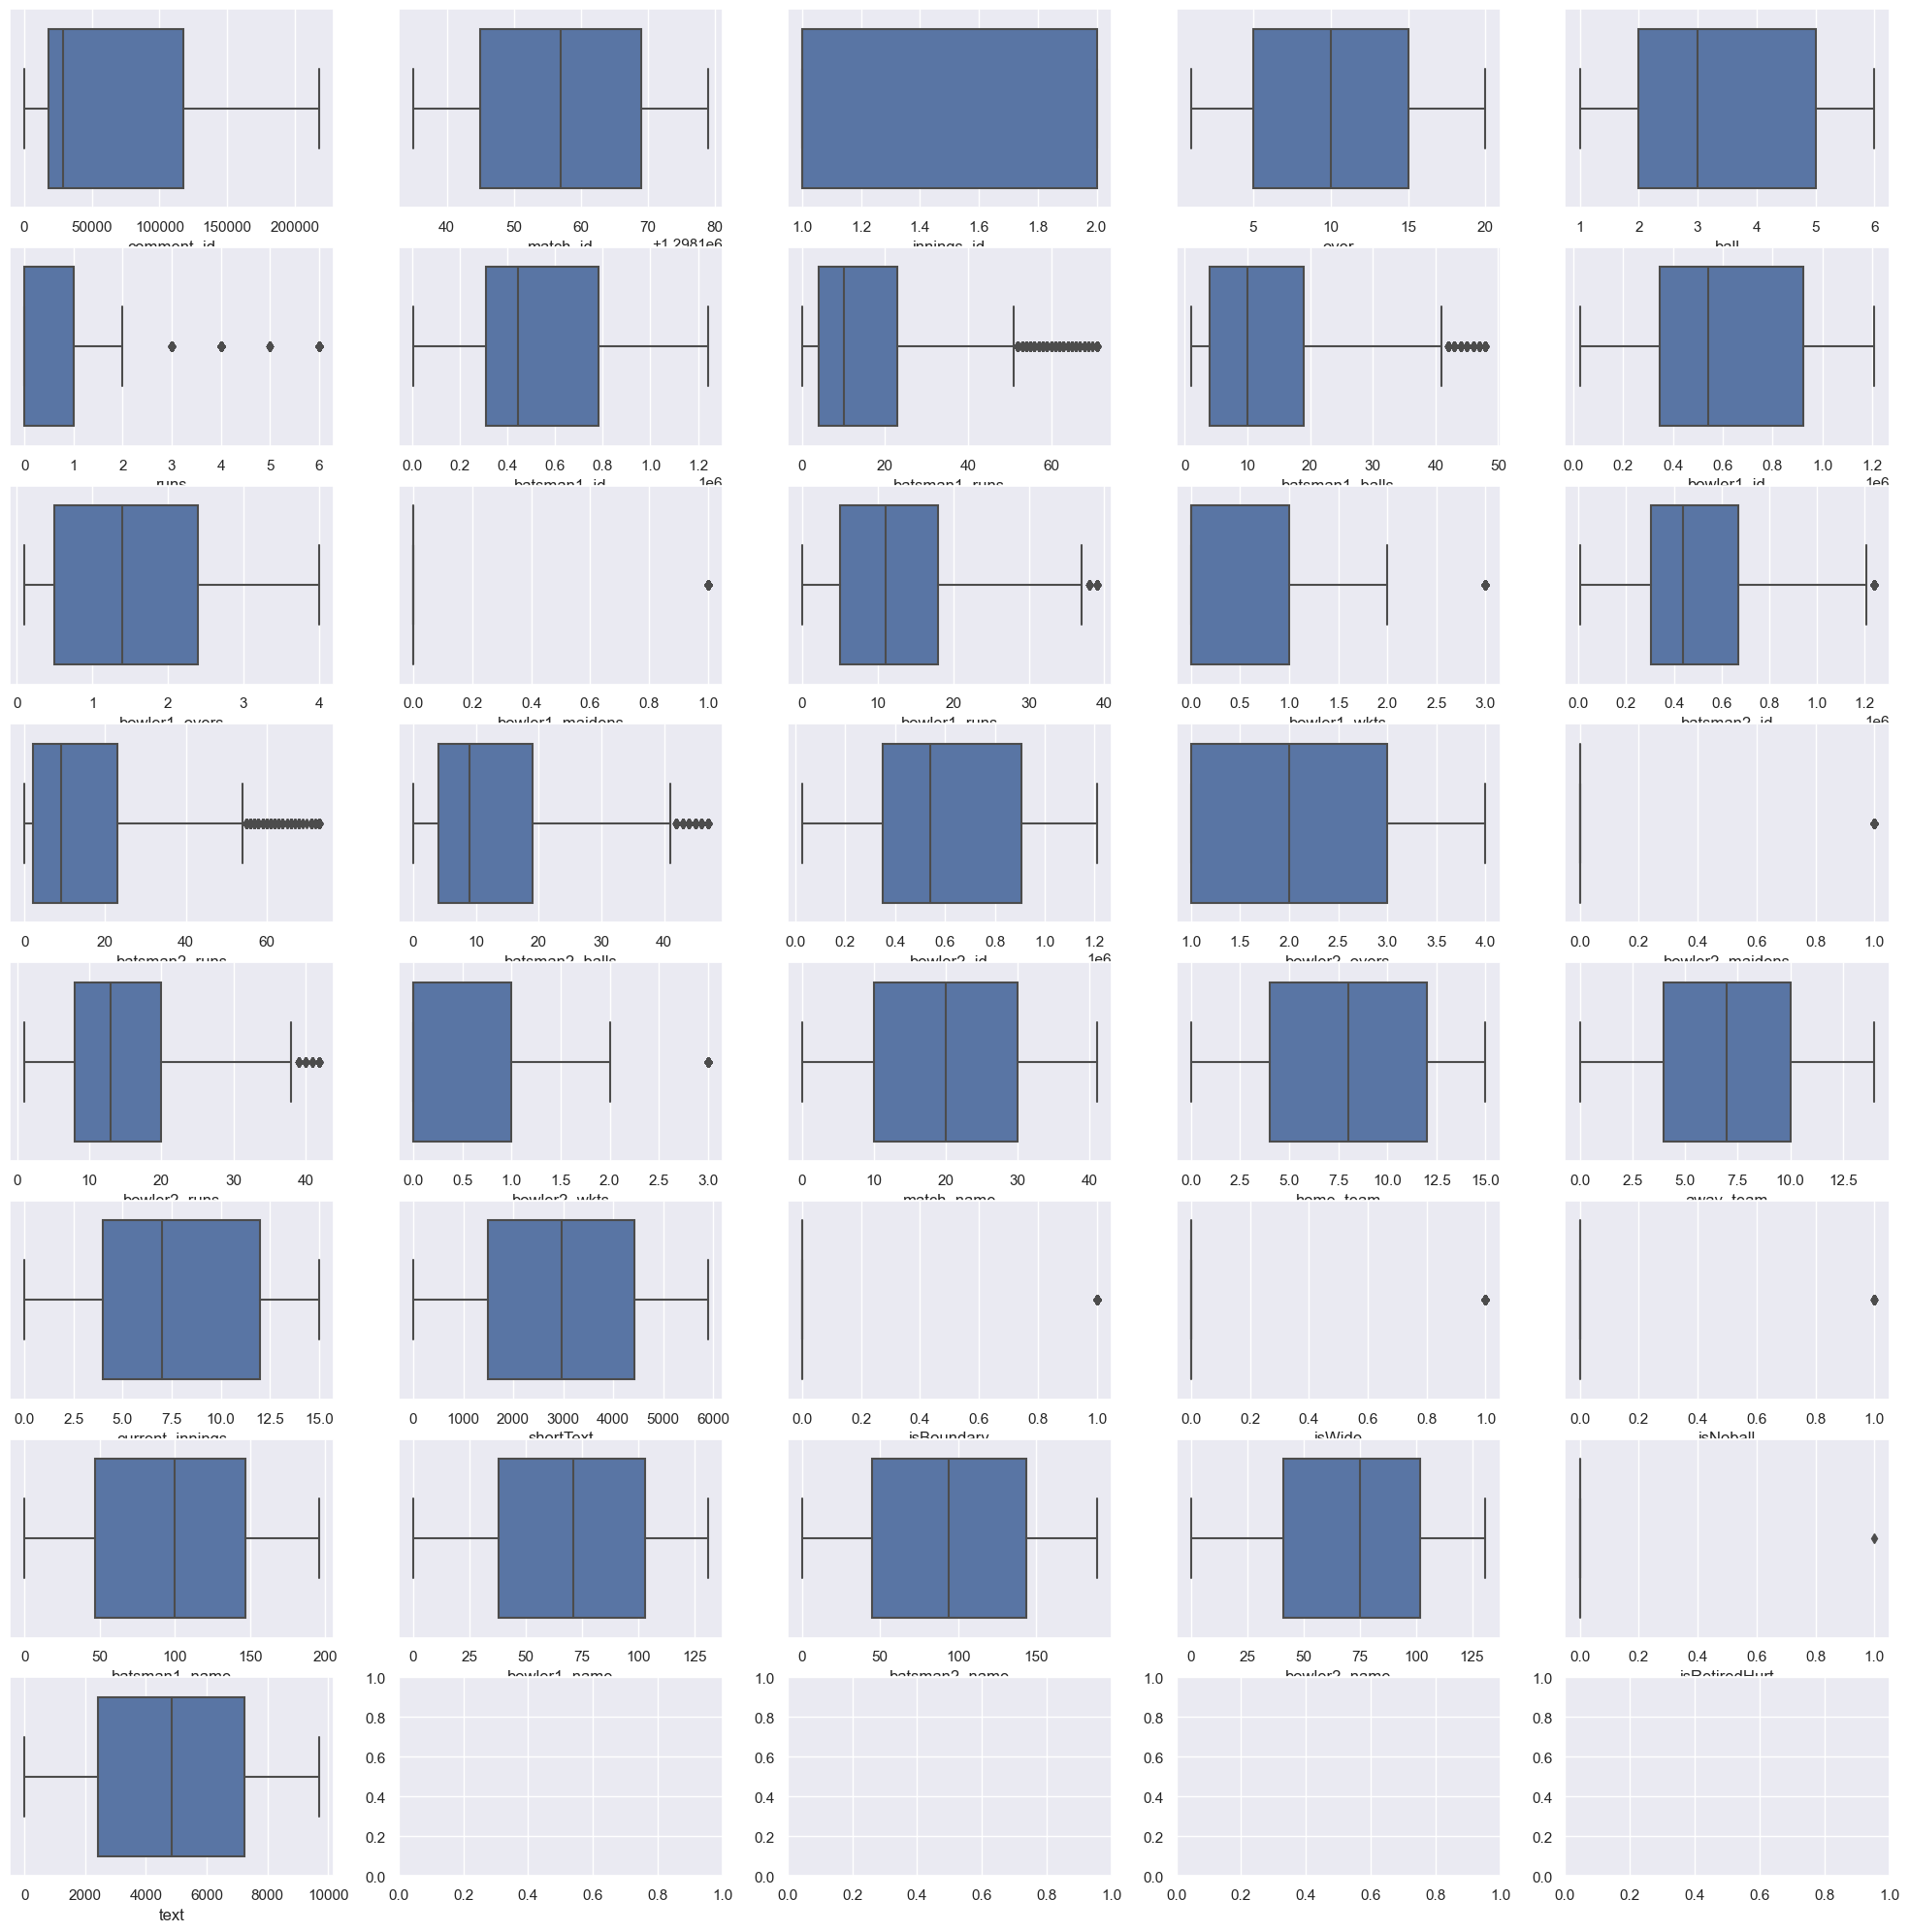

In [38]:
#plotting box plots for outlier detection

fig,ax = plt.subplots(8,5,figsize=(25,25))
sns.set(font_scale = 1)
for var,subplot in zip(fin_df.columns,ax.flatten()):
    sns.set(font_scale = 1)
    sns.boxplot(fin_df[var],ax=subplot)
    
plt.show()

In [39]:
#5 point summary
fin_df.describe()

comment_id       match_id  innings_id        over        ball  \
count   9814.000000    9814.000000 9814.000000 9814.000000 9814.000000   
mean   85390.348482 1298156.915427    1.477787   10.082841    3.486856   
std    78935.603631      13.556295    0.499532    5.623045    1.707484   
min      130.000000 1298135.000000    1.000000    1.000000    1.000000   
25%    18030.000000 1298145.000000    1.000000    5.000000    2.000000   
50%    29010.000000 1298157.000000    1.000000   10.000000    3.000000   
75%   118040.000000 1298169.000000    2.000000   15.000000    5.000000   
max   218080.000000 1298179.000000    2.000000   20.000000    6.000000   

             runs    batsman1_id  batsman1_runs  batsman1_balls  \
count 9814.000000    9814.000000    9814.000000     9814.000000   
mean     1.201651  537654.982474      15.569594       13.207357   
std      1.474534  317970.804869      15.958132       11.318648   
min      0.000000    5334.000000       0.000000        1.000000   
25%      0.000000  308967.000000       4.000000        4.000000   
50%      1.000000  446507.000000      10.000000       10.000000   
75%      1.000000  784367.000000      23.000000       19.000000   
max      6.000000 1241277.000000      71.000000       48.000000   

          bowler1_id  bowler1_overs  bowler1_maidens  bowler1_runs  \
count    9814.000000    9814.000000      9814.000000   9814.000000   
mean   622328.421643       1.659232         0.022213     12.293051   
std    326964.374451       1.106207         0.147384      9.224176   
min     26421.000000       0.100000         0.000000      0.000000   
25%    348109.000000       0.500000         0.000000      5.000000   
50%    542023.000000       1.400000         0.000000     11.000000   
75%    922943.000000       2.400000         0.000000     18.000000   
max   1209110.000000       4.000000         1.000000     39.000000   

       bowler1_wkts    batsman2_id  batsman2_runs  batsman2_balls  \
count   9814.000000    9814.000000    9814.000000     9814.000000   
mean       0.537803  521766.396067      14.869778       12.695231   
std        0.764511  313534.195145      15.918105       11.453402   
min        0.000000    5334.000000       0.000000        0.000000   
25%        0.000000  303427.000000       2.000000        4.000000   
50%        0.000000  437316.000000       9.000000        9.000000   
75%        1.000000  671805.000000      23.000000       19.000000   
max        3.000000 1241277.000000      73.000000       47.000000   

          bowler2_id  bowler2_overs  bowler2_maidens  bowler2_runs  \
count    9814.000000    9814.000000      9814.000000   9814.000000   
mean   617081.206236       2.164286         0.028734     14.558501   
std    319620.361824       1.010132         0.167068      8.957022   
min     26421.000000       1.000000         0.000000      1.000000   
25%    348109.000000       1.000000         0.000000      8.000000   
50%    542023.000000       2.000000         0.000000     13.000000   
75%    906783.000000       3.000000         0.000000     20.000000   
max   1209110.000000       4.000000         1.000000     41.870000   

       bowler2_wkts  match_name   home_team   away_team  current_innings  \
count   9814.000000 9814.000000 9814.000000 9814.000000      9814.000000   
mean       0.602710   20.253108    7.786224    7.277563         7.670165   
std        0.809097   12.012075    4.555057    3.941019         4.410175   
min        0.000000    0.000000    0.000000    0.000000         0.000000   
25%        0.000000   10.000000    4.000000    4.000000         4.000000   
50%        0.000000   20.000000    8.000000    7.000000         7.000000   
75%        1.000000   30.000000   12.000000   10.000000        12.000000   
max        3.000000   41.000000   15.000000   14.000000        15.000000   

        shortText  isBoundary      isWide    isNoball  batsman1_name  \
count 9814.000000 9814.000000 9814.000000 9814.000000    9814.000000   
mean  2959.674648    0.12

In [40]:
#correlation matrix
fin_df.corr()

comment_id  match_id  innings_id      over      ball  \
comment_id         1.000000 -0.004755    0.292207  0.787475 -0.010749   
match_id          -0.004755  1.000000   -0.001963 -0.003401 -0.001153   
innings_id         0.292207 -0.001963    1.000000 -0.057955 -0.003090   
over               0.787475 -0.003401   -0.057955  1.000000 -0.016534   
ball              -0.010749 -0.001153   -0.003090 -0.016534  1.000000   
runs               0.054114  0.027465   -0.022903  0.078562 -0.002003   
batsman1_id        0.063096 -0.232271   -0.020058  0.077392  0.014185   
batsman1_runs      0.258370  0.038405   -0.075357  0.353981  0.012003   
batsman1_balls     0.259985  0.010102   -0.065791  0.345542  0.004673   
bowler1_id        -0.037754 -0.079989   -0.036850 -0.024853 -0.005415   
bowler1_overs      0.648522  0.004526   -0.026526  0.762252  0.223834   
bowler1_maidens    0.045715  0.039551    0.030233  0.048563  0.013714   
bowler1_runs       0.548619  0.065153   -0.047419  0.677275  0.214348   
bowler1_wkts       0.337807 -0.062070    0.071844  0.359862  0.110101   
batsman2_id        0.056267 -0.231792   -0.023431  0.073565 -0.006600   
batsman2_runs      0.267913  0.024238   -0.094918  0.371017  0.018155   
batsman2_balls     0.282100 -0.005939   -0.082359  0.372871  0.025133   
bowler2_id        -0.030346 -0.088418   -0.035252 -0.005611 -0.001833   
bowler2_overs      0.617763  0.001852   -0.020809  0.724246 -0.014508   
bowler2_maidens    0.034505  0.035089    0.045502  0.011459 -0.000105   
bowler2_runs       0.507384  0.069642   -0.048938  0.624560 -0.011728   
bowler2_wkts       0.330782 -0.071036    0.075109  0.378899 -0.008169   
match_name        -0.004893 -0.332149   -0.004056 -0.005989 -0.004563   
home_team         -0.005281 -0.412400   -0.005043 -0.008953 -0.004358   
away_team          0.001010 -0.116776    0.000182  0.000765 -0.001654   
current_innings   -0.013377 -0.280580   -0.032723 -0.006073 -0.000082   
shortText          0.017732 -0.020841   -0.066894  0.045796  0.000390   
isBoundary         0.009118  0.030473   -0.007778  0.010006 -0.006630   
isWide             0.011356 -0.009052   -0.011885  0.017512  0.011997   
isNoball           0.030352  0.002629    0.009025  0.025786 -0.002967   
batsman1_name     -0.008264  0.017106   -0.078626 -0.014633 -0.010845   
bowler1_name       0.023245  0.053475   -0.009311  0.028933  0.000764   
batsman2_name     -0.006182  0.014542   -0.104593  0.001131  0.001401   
bowler2_name      -0.029675  0.057418   -0.014290 -0.049746  0.001537   
isRetiredHurt     -0.008996  0.004531   -0.009656 -0.007330  0.008946   
text               0.042288  0.044993   -0.007569  0.047917  0.010888   

                     runs  batsman1_id  batsman1_runs  batsman1_balls  \
comment_id       0.054114     0.063096       0.258370        0.259985   
match_id         0.027465    -0.232271       0.038405        0.010102   
innings_id      -0.022903    -0.020058      -0.075357       -0.065791   
over             0.078562     0.077392       0.353981        0.345542   
ball            -0.002003     0.014185       0.012003        0.004673   
runs             1.000000    -0.022547       0.222438        0.124808   
batsman1_id     -0.022547     1.000000      -0.071932       -0.058494   
batsman1_runs    0.222438    -0.071932       1.000000        0.932834   
batsman1_balls   0.124808    -0.058494       0.932834        1.000000   
bowler1_id      -0.007641    -0.006742      -0.042219       -0.031500   
bowler1_overs    0.053253     0.067703       0.258514        0.245756   
bowler1_maidens -0.003732     0.006784       0.000209        0.005302   
bowler1_runs     0.243238     0.017731       0.371912        0.290974   
bowler1_wkts    -0.078855     0.070066      -0.068880       -0.077283   
batsman2_id     -0.029091     0.147815      -0.069064       -0.050027   
batsman2_runs    0.048716    -0.042358       0.103441        0.071505   
batsman2_balls   0.046879    -0.026680       0.080178        0.054986   
b

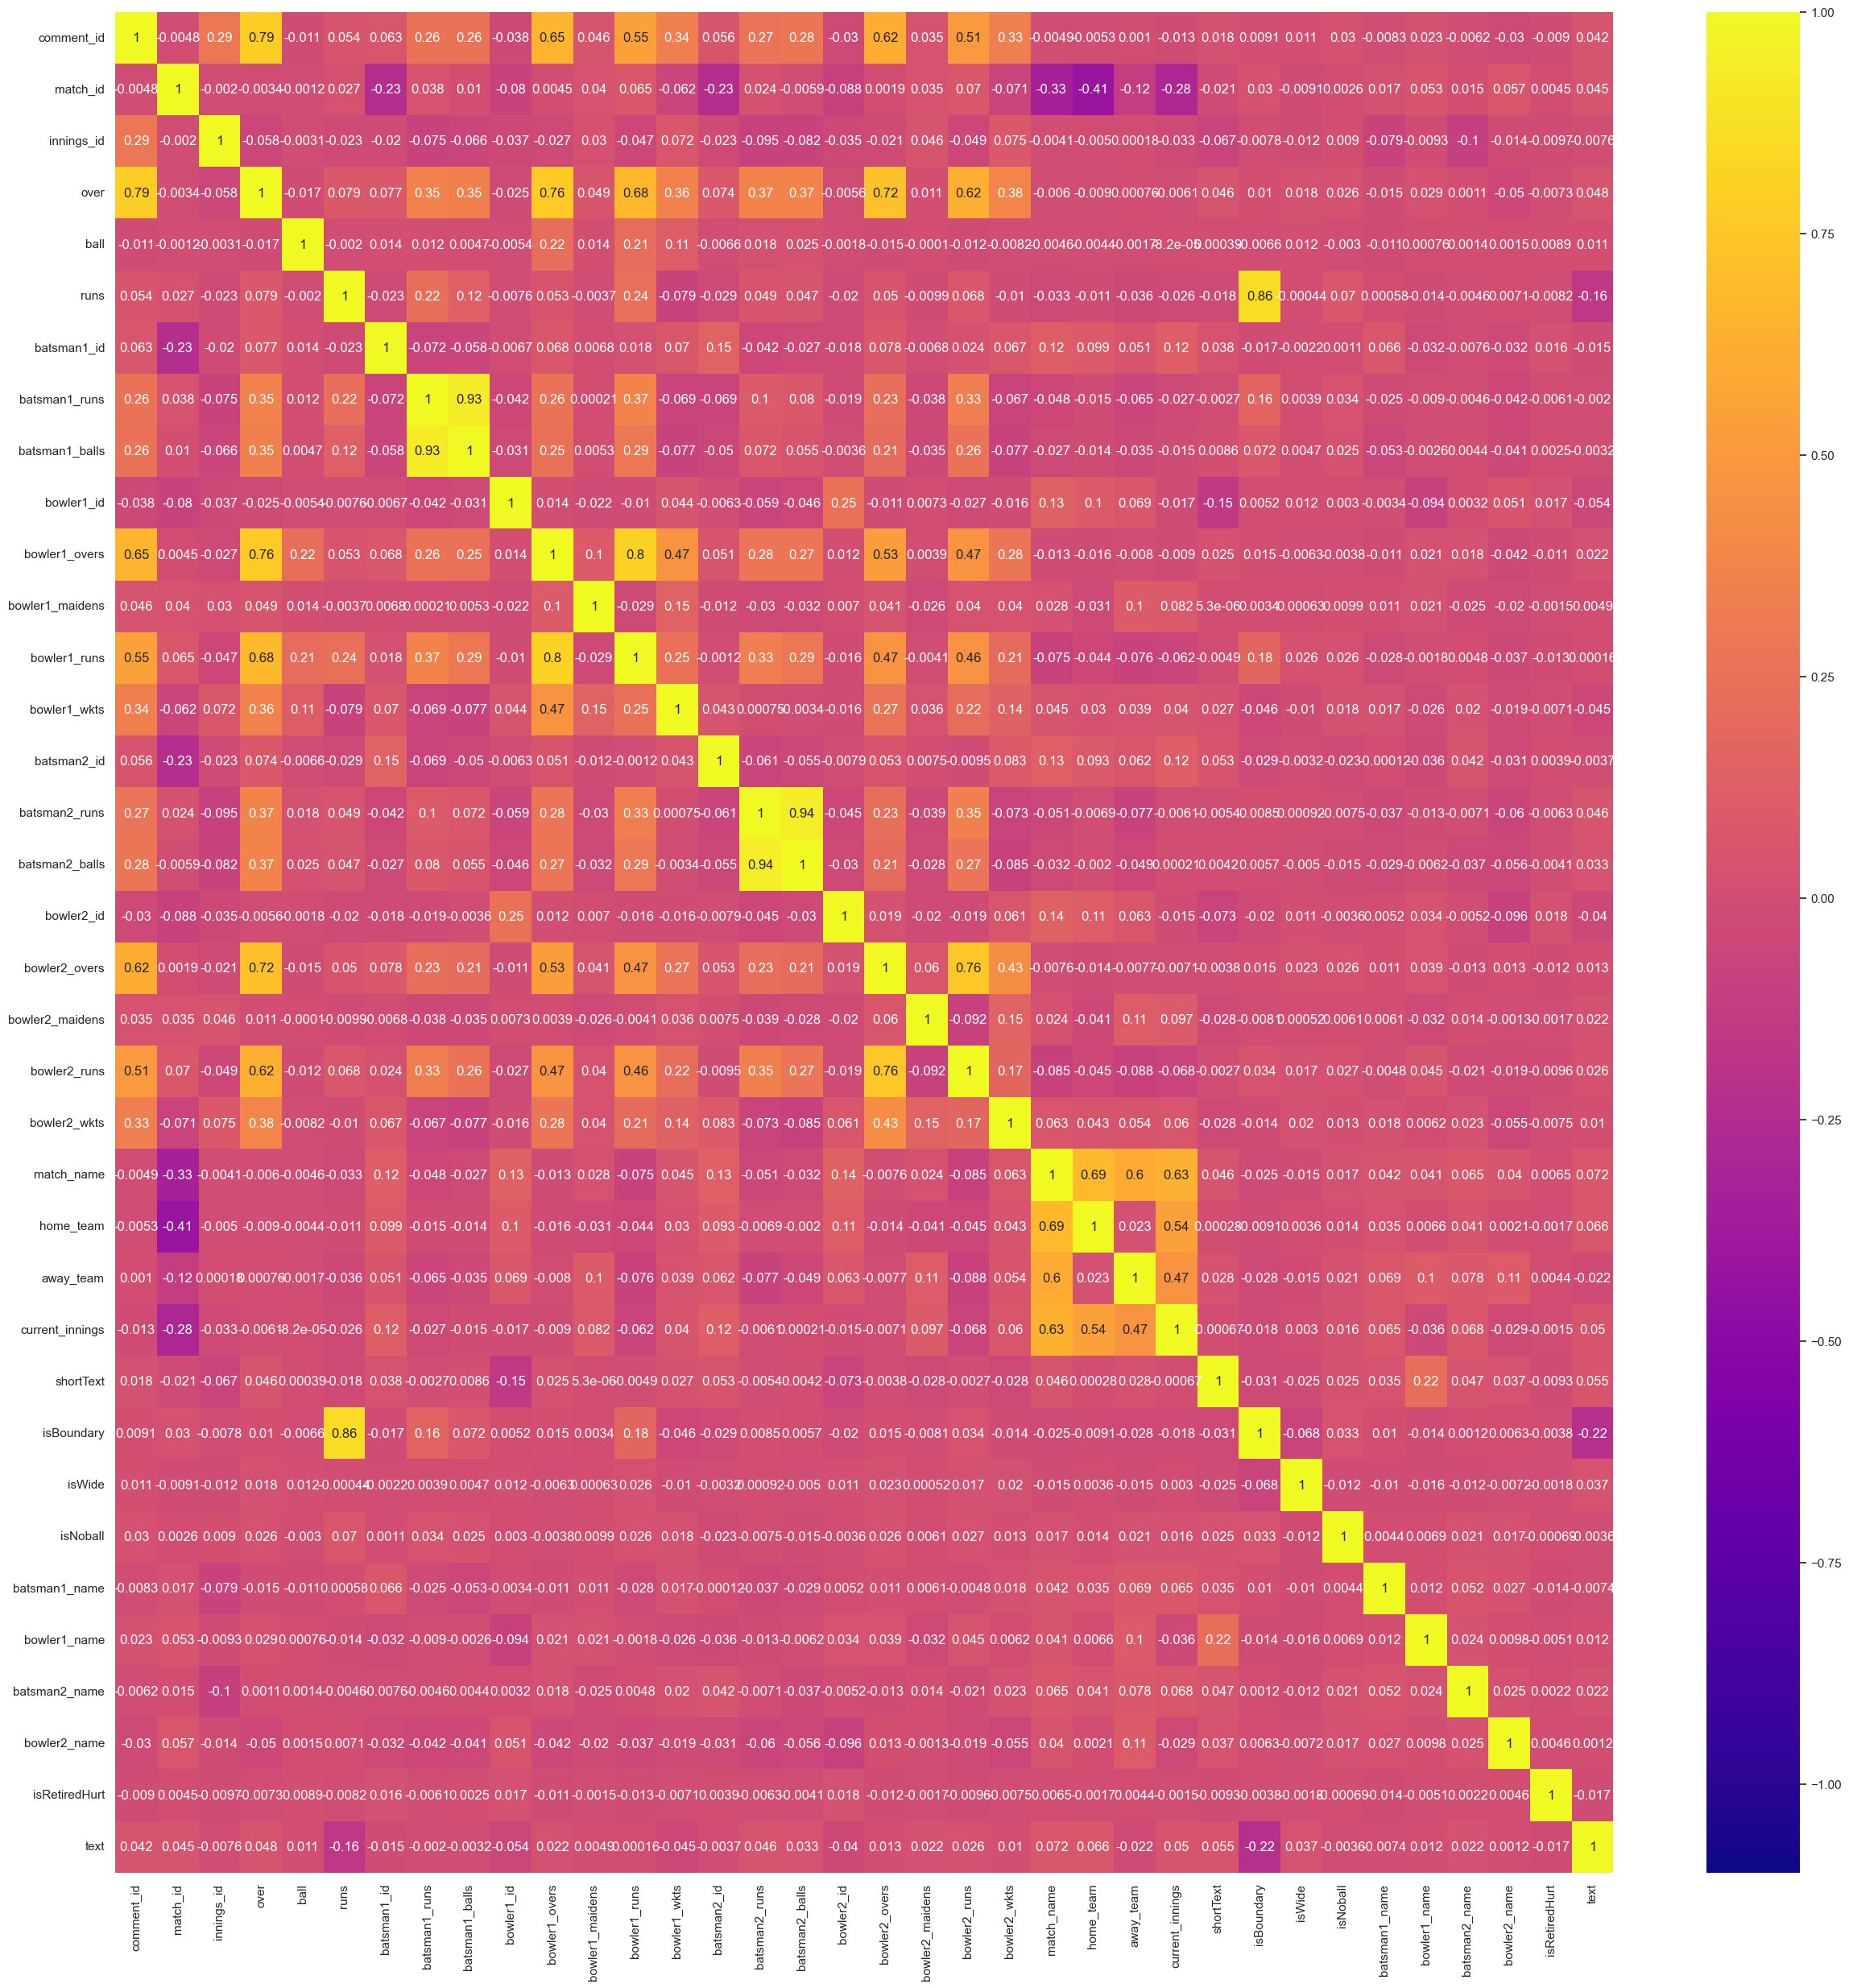

In [41]:
#heatmap
plt.figure(figsize=(30,30))
sns.set(font_scale = 1)
sns.heatmap(fin_df.corr(),cmap='plasma',annot=True,vmin=1.0,vmax=-1.0,annot_kws={"size":12})
plt.show()

The heatmap represents the display of correlation. The brighter colour represents positive co relation while darker shades represent negative correlation. It displays that 'overs' are positively correlated with 'runs' and 'wickets' and 'maidens' are negatively co related with 'runs'.